# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Creating a dictionary for ease of access of description during runtime.**

In [87]:
taxi_fields = {
    "VendorID": "A code indicating the TPEP provider that provided the record. "
                "1=Creative Mobile Technologies, LLC; 2=VeriFone Inc.",

    "tpep_pickup_datetime": "The date and time when the meter was engaged.",
    "tpep_dropoff_datetime": "The date and time when the meter was disengaged.",

    "Passenger_count": "The number of passengers in the vehicle (driver-entered).",

    "Trip_distance": "The elapsed trip distance in miles reported by the taximeter.",

    "PULocationID": "TLC Taxi Zone in which the taximeter was engaged.",
    "DOLocationID": "TLC Taxi Zone in which the taximeter was disengaged.",

    "RateCodeID": (
        "The final rate code in effect at the end of the trip. "
        "1=Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, "
        "5=Negotiated fare, 6=Group ride"
    ),

    "store_and_fwd_flag": (
        "Indicates whether the trip record was held in vehicle memory before sending. "
        "Y=store and forward trip, N=not a store and forward trip"
    ),

    "payment_type": (
        "A numeric code signifying how the passenger paid. "
        "1=Credit card, 2=Cash, 3=No charge, 4=Dispute, "
        "5=Unknown, 6=Voided trip"
    ),

    "fare_amount": "The time-and-distance fare calculated by the meter.",

    "extra": "Miscellaneous extras and surcharges, including rush hour and overnight charges.",

    "mt_tax": "0.50 USD MTA tax automatically triggered based on the metered rate.",

    "improvement_surcharge": (
        "0.30 USD improvement surcharge assessed at flag drop (since 2015)."
    ),

    "tip_amount": (
        "Tip amount automatically populated for credit card tips; "
        "cash tips are not included."
    ),

    "tolls_amount": "Total amount of all tolls paid in the trip.",

    "total_amount": "The total amount charged to passengers (excluding cash tips).",

    "congestion_Surcharge": "Total amount collected for NYS congestion surcharge.",

    "airport_fee": "1.25 USD fee for pickups at LaGuardia and JFK airports."
}

print(taxi_fields['airport_fee'])
print(taxi_fields['RateCodeID'])

1.25 USD fee for pickups at LaGuardia and JFK airports.
The final rate code in effect at the end of the trip. 1=Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride


**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings(action="ignore")


In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [ ]:
# List of continuous (numerical) columns in the dataset
cont_cols = ["passenger_count", "trip_distance", "PULocationID", "DOLocationID" ]

# Fare related columns
fare_cols = ["fare_amount", "RatecodeID", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount","congestion_surcharge", "airport_fee"]

# List of categorical columns in the dataset
# store_and_fwd_flag, Pclass, Sex, SibSp, Parch, and Embarked are categorical variables
cat_cols = ["store_and_fwd_flag", "payment_type"]

# List of identifier columns in the dataset
# These columns uniquely identify passengers but do not contribute to the analysis
date_cols = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

total_rows = 0
# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        local_df = pd.read_parquet(file_path)

        # check for all unique values in each of the fields
        output = ""
        for key in cat_cols:
            unique_values = local_df[key].unique()
            output += f"{key}: {unique_values},"
        if "Airport_fee" in local_df.columns:
           neg = (local_df['Airport_fee'] < 0).sum()
           output += f" [Airport_fee - (neg#: {neg})]"
        if "airport_fee" in local_df.columns:
           neg = (local_df['airport_fee'] < 0).sum()
           output += f" [airport_fee: - (neg#: {neg})]"
        output += f", Min pickup time: {local_df['tpep_pickup_datetime'].min()}"
        total_rows += local_df.shape[0]
        print(f"In {file_name} unique values in {output}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
print(f"Total rows: {total_rows}")

In 2023-9.parquet unique values in store_and_fwd_flag: ['N' 'Y' None],payment_type: [2 1 3 4 0], [Airport_fee - (neg#: 29)], Min pickup time: 2008-12-31 15:05:04
In 2023-5.parquet unique values in store_and_fwd_flag: ['N' 'Y' None],payment_type: [2 4 1 3 0], [Airport_fee - (neg#: 23)], Min pickup time: 2008-12-31 23:05:06
In 2023-6.parquet unique values in store_and_fwd_flag: ['N' 'Y' None],payment_type: [1 2 3 4 0], [Airport_fee - (neg#: 40)], Min pickup time: 2001-01-01 00:07:36
In 2023-2.parquet unique values in store_and_fwd_flag: ['N' 'Y' None],payment_type: [2 1 4 3 5 0], [Airport_fee - (neg#: 38)], Min pickup time: 2001-01-01 00:06:49
In 2023-1.parquet unique values in store_and_fwd_flag: ['N' 'Y' None],payment_type: [2 1 4 3 0], [airport_fee: - (neg#: 39)], Min pickup time: 2008-12-31 23:01:42
In 2023-8.parquet unique values in store_and_fwd_flag: ['N' 'Y' None],payment_type: [1 2 4 3 0], [Airport_fee - (neg#: 24)], Min pickup time: 2002-12-31 22:27:05
In 2023-7.parquet unique 

**Analysis:**

#### There are around **37.9m** rows accross all files for 2023.

#### This shows that parquet file as the column name 'Airport_fee' incorrectly renamed as 'airport_fee' in the 2023-1.parquet file.


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        local_df = pd.read_parquet(file_path)
        print(f"Processing file ${file_name}")
        # Not attempting rename of the column in the df as follow question would
        # become invalid. So continuing with sampling of data as it is.

        # if 'airport_fee' in local_df.columns:
        #   print(f"Handling 'airport_fee' column in file ${file_name}")
        #   local_df = local_df.rename(columns={'airport_fee': 'Airport_fee'})
        local_df['tpep_pickup_datetime'] = pd.to_datetime(local_df['tpep_pickup_datetime'])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Get unique dates from the current month's data
        unique_dates = local_df['tpep_pickup_datetime'].dt.date.unique()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            # Iterate through each hour of the selected date
            data_for_date = local_df[local_df['tpep_pickup_datetime'].dt.date == date]
            hour_list = data_for_date['tpep_pickup_datetime'].dt.hour.unique()
            for hour in hour_list:
              hour_data = data_for_date[data_for_date['tpep_pickup_datetime'].dt.hour == hour]
              if not hour_data.empty: # Only sample if there's data for the hour
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing file $2023-9.parquet
Processing file $2023-5.parquet
Processing file $2023-6.parquet
Processing file $2023-2.parquet
Processing file $2023-1.parquet
Processing file $2023-8.parquet
Processing file $2023-7.parquet
Processing file $2023-10.parquet
Processing file $2023-3.parquet
Processing file $2023-12.parquet
Processing file $2023-4.parquet
Processing file $2023-11.parquet


In [ ]:
df.shape

(1896400, 20)

As the total rows are much higher, performing a random sampling again on it to get rows in the range of 250k to 300k.

In [ ]:
df = df.sample(frac=0.15, random_state=42)
df.shape

(284460, 20)

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1399055         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
41775           2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
1149477         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
805641          1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
1774725         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1399055          12.60         1.0                  N           132   
41775             1.05         1.0                  N           239   
1149477           1.85         1.0                  N           114   
805641            1.80         1.0                  N           239   
1774725           2.61         1.0                  N           186   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1399055           181             1         60.4    0.0      0.5       12.35   
41775             142             1          9.3    0.0      0.5        3.33   
1149477           164             1         11.4    1.0      0.5        3.28   
805641             75             1         11.4    2.5      0.5        4.60   
1774725           113             1         17.7    0.0      0.5        4.34   

         tolls_amount  improvement_surcharge  total_amount  \
1399055           0.0                    1.0         74.25   
41775             0.0                    1.0         16.63   
1149477           0.0                    1.0         19.68   
805641            0.0                    1.0         20.00   
1774725           0.0                    1.0         26.04   

         congestion_surcharge  Airport_fee  airport_fee  
1399055                   0.0          0.0          NaN  
41775                     2.5          0.0          NaN  
1149477                   2.5          0.0          NaN  
805641                    2.5          0.0          NaN  
1774725                   2.5          0.0          NaN

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
#df.to_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/Output/trip_records_sampled.parquet')

In [ ]:
# Common functions used in the code below

def print_negatives(df):
  numeric_cols = df.select_dtypes(include=np.number).columns
  for col in numeric_cols:
    if (df[col] < 0).any():
      print(f"{col} - Negative #: {df.loc[df[col] < 0].shape[0]}")

# Combine the two airport fee columns
def calculate_airport_fee(row):
    if pd.notna(row['airport_fee']) and pd.notna(row['Airport_fee']):
        return row['airport_fee'] + row['Airport_fee']
    elif pd.notna(row['Airport_fee']):
        return row['Airport_fee']
    elif pd.notna(row['airport_fee']):
        return row['airport_fee']
    else:
        return 0

def print_fare_colmn_negatives(df):
  for col in fare_cols:
    if (df[col] < 0).any():
       print(f"{col} - Negative #: {df.loc[df[col] < 0].shape[0]}")

def get_negative_data_cols(df):
  # Find which columns have negative values
  numeric_cols = df.select_dtypes(include=np.number).columns

  negative_value_columns = []

  # Iterate through numeric columns and check for negative values
  for col in numeric_cols:
      if (df[col] < 0).any():
          negative_value_columns.append(col)

  print("Columns with negative values:", negative_value_columns)

def get_null_data_cols(df):
  # Find which columns have null values
  numeric_cols = df.select_dtypes(include=np.number).columns
  null_value_cols = []

  # Iterate through numeric columns and check for null values
  for col in numeric_cols:
      if df[col].isnull().any():
          null_value_cols.append(col)

  print("Columns with null values:", null_value_cols)



**Explanation**

Few helper function definitions above.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/Output/trip_records_sampled.parquet')

In [ ]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1399055         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
41775           2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
1149477         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
805641          1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
1774725         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1399055          12.60         1.0                  N           132   
41775             1.05         1.0                  N           239   
1149477           1.85         1.0                  N           114   
805641            1.80         1.0                  N           239   
1774725           2.61         1.0                  N           186   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1399055           181             1         60.4    0.0      0.5       12.35   
41775             142             1          9.3    0.0      0.5        3.33   
1149477           164             1         11.4    1.0      0.5        3.28   
805641             75             1         11.4    2.5      0.5        4.60   
1774725           113             1         17.7    0.0      0.5        4.34   

         tolls_amount  improvement_surcharge  total_amount  \
1399055           0.0                    1.0         74.25   
41775             0.0                    1.0         16.63   
1149477           0.0                    1.0         19.68   
805641            0.0                    1.0         20.00   
1774725           0.0                    1.0         26.04   

         congestion_surcharge  Airport_fee  airport_fee  
1399055                   0.0          0.0          NaN  
41775                     2.5          0.0          NaN  
1149477                   2.5          0.0          NaN  
805641                    2.5          0.0          NaN  
1774725                   2.5          0.0          NaN

In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284460 entries, 1399055 to 1309443
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284460 non-null  int64         
 1   tpep_pickup_datetime   284460 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284460 non-null  datetime64[us]
 3   passenger_count        274594 non-null  float64       
 4   trip_distance          284460 non-null  float64       
 5   RatecodeID             274594 non-null  float64       
 6   store_and_fwd_flag     274594 non-null  object        
 7   PULocationID           284460 non-null  int64         
 8   DOLocationID           284460 non-null  int64         
 9   payment_type           284460 non-null  int64         
 10  fare_amount            284460 non-null  float64       
 11  extra                  284460 non-null  float64       
 12  mta_tax                284460 non-null  fl

In [ ]:
df.shape

(284460, 20)

In [ ]:
sample_percentage = (df.shape[0] / total_rows) * 100
print(f"Sample percentage: {sample_percentage:0.2f}")

Sample percentage: 0.75


In [ ]:
print_negatives(df)

mta_tax - Negative #: 13
improvement_surcharge - Negative #: 14
total_amount - Negative #: 14
congestion_surcharge - Negative #: 10
Airport_fee - Negative #: 1


In [ ]:
get_null_data_cols(df)

Columns with null values: ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'Airport_fee', 'airport_fee']


**Explanation**

#### There are around **37.9m** rows accross all files for 2023.
#### Number of entries in the sampled data **284460 rows**
#### Sampling percentage is **0.75**

#### This shows that parquet file as the column name 'Airport_fee' incorrectly renamed as 'airport_fee' in the 2023-1.parquet file.

### Alos there are following negatives columns:
* mta_tax
* improvement_surcharge
* total_amount
* congestion_surcharge
* airport_fee

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                  N           132           181   
1           1.05         1.0                  N           239           142   
2           1.85         1.0                  N           114           164   
3           1.80         1.0                  N           239            75   
4           2.61         1.0                  N           186           113   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         60.4    0.0      0.5       12.35           0.0   
1             1          9.3    0.0      0.5        3.33           0.0   
2             1         11.4    1.0      0.5        3.28           0.0   
3             1         11.4    2.5      0.5        4.60           0.0   
4             1         17.7    0.0      0.5        4.34           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         74.25                   0.0          0.0   
1                    1.0         16.63                   2.5          0.0   
2                    1.0         19.68                   2.5          0.0   
3                    1.0         20.00                   2.5          0.0   
4                    1.0         26.04                   2.5          0.0   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

Reset of index to get the index realigned.

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:

df['Airport_fee_combo'] = df.apply(calculate_airport_fee, axis=1)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                  N           132           181   
1           1.05         1.0                  N           239           142   
2           1.85         1.0                  N           114           164   
3           1.80         1.0                  N           239            75   
4           2.61         1.0                  N           186           113   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    0.0      0.5       12.35           0.0   
1             1  ...    0.0      0.5        3.33           0.0   
2             1  ...    1.0      0.5        3.28           0.0   
3             1  ...    2.5      0.5        4.60           0.0   
4             1  ...    0.0      0.5        4.34           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         74.25                   0.0          0.0   
1                    1.0         16.63                   2.5          0.0   
2                    1.0         19.68                   2.5          0.0   
3                    1.0         20.00                   2.5          0.0   
4                    1.0         26.04                   2.5          0.0   

   airport_fee  Airport_fee_combo  
0          NaN                0.0  
1          NaN                0.0  
2          NaN                0.0  
3          NaN                0.0  
4          NaN                0.0  

[5 rows x 21 columns]

In [ ]:
# Dropping airport fees and 'Airport_fee' column as all zero values.
df.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)

# Rename 'Airport_fee_combo' to 'Airport_fee'
df = df.rename(columns={'Airport_fee_combo': 'airport_fee'})
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                  N           132           181   
1           1.05         1.0                  N           239           142   
2           1.85         1.0                  N           114           164   
3           1.80         1.0                  N           239            75   
4           2.61         1.0                  N           186           113   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         60.4    0.0      0.5       12.35           0.0   
1             1          9.3    0.0      0.5        3.33           0.0   
2             1         11.4    1.0      0.5        3.28           0.0   
3             1         11.4    2.5      0.5        4.60           0.0   
4             1         17.7    0.0      0.5        4.34           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         74.25                   0.0          0.0  
1                    1.0         16.63                   2.5          0.0  
2                    1.0         19.68                   2.5          0.0  
3                    1.0         20.00                   2.5          0.0  
4                    1.0         26.04                   2.5          0.0

**Explanation**


So, looking into the data, it is found that there are two airport fee columns, one with name 'Airport_fee' and other with all small case word, 'airport_fee'. The file '2023-1.parquet' has got 'airport_fee' column and rest all files have 'Airport_fee'.

So, as the approach to combine them together, we look for each row and take the value for the column among the two which has the valid data. Here calling a user defined function *calculate_airport_fee()* which is having the logic of taking the right column name out of 'Airport Fee' or 'airport_fee' if it is not nan in a row. Then in the next step, we are renaming that new column 'airport_fee_combo' to 'airport_fee'.

In [ ]:
df.loc[df['airport_fee'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
517541         2  2023-03-13 11:40:22   2023-03-13 11:51:53              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
517541           3.49         1.0                  N           138   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
517541           253             2          0.0    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
517541           0.0                   -1.0         -2.75   

        congestion_surcharge  airport_fee  
517541                   0.0        -1.25

**Explanation**

There is only one airport fee column with negative value and that is also having -1.25. This looks like an data entry error.

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

# Handling negative values in 'total_amount' column.
df_neg_total_fare = df.loc[df['total_amount'] < 0.0]
df_neg_total_fare.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1115554         2  2023-10-06 16:38:25   2023-10-06 16:39:09              2.0   
696611          2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
977821          2  2023-05-15 15:16:08   2023-05-15 15:16:22              2.0   
7156            2  2023-09-02 18:29:48   2023-09-02 18:30:13              3.0   
1108196         2  2023-10-04 21:02:32   2023-10-04 21:02:36              4.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1115554           0.01         2.0                  N           107   
696611           17.68         2.0                  N           230   
977821            0.00         2.0                  N           107   
7156              0.00         2.0                  N            74   
1108196           0.00         2.0                  N           113   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1115554           107             2          0.0    0.0     -0.5         0.0   
696611            132             2          0.0    0.0     -0.5         0.0   
977821            107             2          0.0    0.0     -0.5         0.0   
7156               74             2          0.0    0.0     -0.5         0.0   
1108196           264             2          0.0    0.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
1115554           0.0                   -1.0          -4.0   
696611            0.0                   -1.0          -4.0   
977821            0.0                   -1.0          -4.0   
7156              0.0                   -1.0          -1.5   
1108196           0.0                   -1.0          -1.5   

         congestion_surcharge  airport_fee  
1115554                  -2.5          0.0  
696611                   -2.5          0.0  
977821                   -2.5          0.0  
7156                      0.0          0.0  
1108196                   0.0          0.0

In [ ]:
# Checking for any other matching entry presence for which total_amount
# is negative.

matching_trips = pd.DataFrame()
for index, row in df_neg_total_fare.iterrows():
    pu_loc = row['PULocationID']
    do_loc = row['DOLocationID']
    trip_dist = row['trip_distance']
    tpep_pickup_datetime = row['tpep_pickup_datetime']
    tpep_dropoff_datetime = row['tpep_dropoff_datetime']


    # Filter the main df for matching trips
    matches = df[
        (df['PULocationID'] == pu_loc) &
        (df['DOLocationID'] == do_loc) &
        (df['trip_distance'] == trip_dist) &
        (df['tpep_pickup_datetime'] == tpep_pickup_datetime) &
        (df['tpep_dropoff_datetime'] == tpep_dropoff_datetime)
    ]

    # Concatenate matching trips to the matching_trips DataFrame
    #print(f"Matching trips found {len(matches)}:")
    #display(matches)
    matching_trips = pd.concat([matching_trips, matches], ignore_index=True)

print(f"Total matching trips found: {len(matching_trips)}")
display(matching_trips.head())

Total matching trips found: 14


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-06 16:38:25   2023-10-06 16:39:09              2.0   
1         2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
2         2  2023-05-15 15:16:08   2023-05-15 15:16:22              2.0   
3         2  2023-09-02 18:29:48   2023-09-02 18:30:13              3.0   
4         2  2023-10-04 21:02:32   2023-10-04 21:02:36              4.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.01         2.0                  N           107           107   
1          17.68         2.0                  N           230           132   
2           0.00         2.0                  N           107           107   
3           0.00         2.0                  N            74            74   
4           0.00         2.0                  N           113           264   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          0.0    0.0     -0.5         0.0           0.0   
1             2          0.0    0.0     -0.5         0.0           0.0   
2             2          0.0    0.0     -0.5         0.0           0.0   
3             2          0.0    0.0     -0.5         0.0           0.0   
4             2          0.0    0.0     -0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                   -1.0          -4.0                  -2.5          0.0  
1                   -1.0          -4.0                  -2.5          0.0  
2                   -1.0          -4.0                  -2.5          0.0  
3                   -1.0          -1.5                   0.0          0.0  
4                   -1.0          -1.5                   0.0          0.0

**Explanation**

Above code is trying to find an entry for a matching positive total_amount, to see if the negative total_amount entry was added to provide some kind of refund.
But there's no other matching entry found for the same pickup time, drop time, pickup location, drop location and trip_distance.  As no such entry was found in the sampled data, so concluding that it is not the refund / adjument entries and would be handling the negative entries later.



Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

df.loc[df['total_amount'] < 0, 'RatecodeID'].unique()

array([2., 1., 5.])

In [ ]:
(df['RatecodeID']).unique()

array([ 1., nan,  2.,  3., 99.,  5.,  4.,  6.])

**Explanation**

Negative total_amount is only applied to standard, airport trips and negotiated trips. This could be due to refund adjustment for certain trips.

Also there is an unknown RatecodeID of '99' apart from few nan entries.

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
df_null_prop = df.isnull().mean()*100
df_null_prop.rename('Null proportion', inplace=True)
df_null_prop.reset_index(drop=True)
df_null_prop.sort_values(ascending=False, inplace=True)
df_null_prop.head()



store_and_fwd_flag       3.468326
RatecodeID               3.468326
passenger_count          3.468326
congestion_surcharge     3.468326
tpep_dropoff_datetime    0.000000
Name: Null proportion, dtype: float64

**Explanation**

There are lots of mising values in store_and_fwd_flag, RatecodeID, passenger_count, congestion_surcharge columns. Need to take care of them.


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df['passenger_count'].isna()].shape[0]

9866

In [ ]:
# Calculate the mode of 'passenger_count'
# Using mode here as passenger_count replacement for missing data as we are attempting
# fill it most frequent data. Also the fare calculation doesn't depend upon this passenger_count
# so this is okay to use this.
passengerCountMode = df['passenger_count'].mode()[0]

# Impute NaN values in 'passenger_count' with the mode
df['passenger_count'] = df['passenger_count'].fillna(passengerCountMode)

print(f"Missing values in 'passenger_count' after imputation: {df['passenger_count'].isnull().sum()}")

Missing values in 'passenger_count' after imputation: 0


**Explanation**

Using mode here as passenger_count replacement for missing data as we are attempting fill it most frequent data. Also the fare calculation doesn't depend upon this passenger_count so this is okay to use this.

Did you find zeroes in passenger_count? Handle these.

In [ ]:
df.loc[df['passenger_count'] == 0].shape[0]

4450

**Explanation**


There are 4450 entries where passenger_count is 0. Would be handling them in the later part of the code.

You also noticed entries where `passenger_count` is `0`. This is generally not expected for a taxi trip, and will be handled as part of outlier detection in the next section.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing data in 'RatecodeID'
ratecodeMode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(ratecodeMode)

print(f"Missing data in 'RatecodeID' after correction / imputation: {df['RatecodeID'].isnull().sum()}")

Missing data in 'RatecodeID' after correction / imputation: 0


**Explanation**

Using the mode for the RatecodeID column again to fill the null values in the column.

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null data in congestion_surcharge
congestion_surcharge_mode = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(congestion_surcharge_mode)

print(f"Missing data in 'congestion_surcharge' after correction / imputation: {df['congestion_surcharge'].isnull().sum()}")

Missing data in 'congestion_surcharge' after correction / imputation: 0


**Explanation**

Taking the mode of congestion_surcharge to fill the null values for this column. This it to fill its value with the most common data in the column instead of mean or median.

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
# Impute NaN values in 'store_and_fwd_flag'
store_and_fwd_flag_mode = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode)


**Explanation**

Filling the mode value for 'store_and_fwd_flag' value to fill the nan values in that as we want to populate it with the most common flag value.

In [ ]:
# Now all the null values are handled. Printing the final data.
print(df.isna().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


**Explanation**

This shows that there no nan values left in any column now. So we are good to progress to next stage.

In [ ]:
df['passenger_count'].value_counts()

passenger_count
1.0    216356
2.0     41589
3.0     10294
4.0      5701
0.0      4450
5.0      3656
6.0      2411
9.0         2
8.0         1
Name: count, dtype: int64

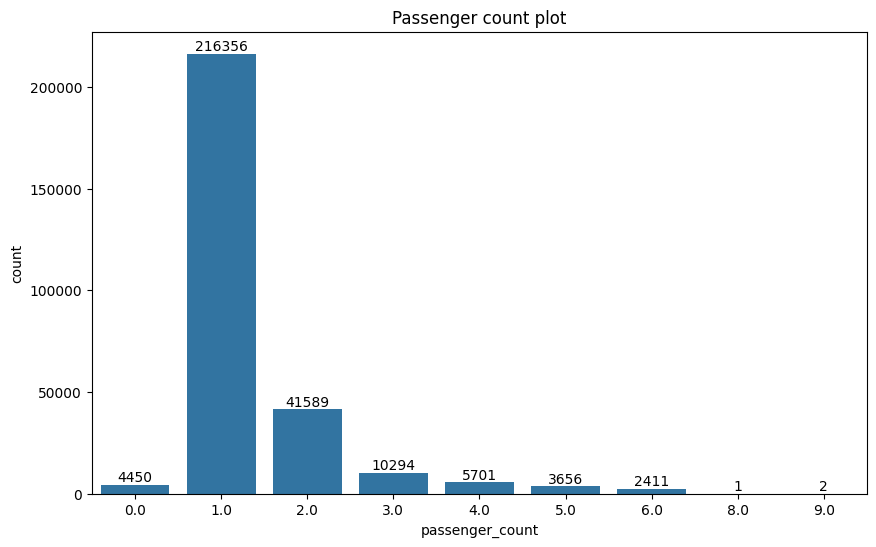

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='passenger_count')
plt.title('Passenger count plot')
ax.bar_label(ax.containers[0])
plt.show()
plt.savefig('../newcharts/passenger_countplot.png')

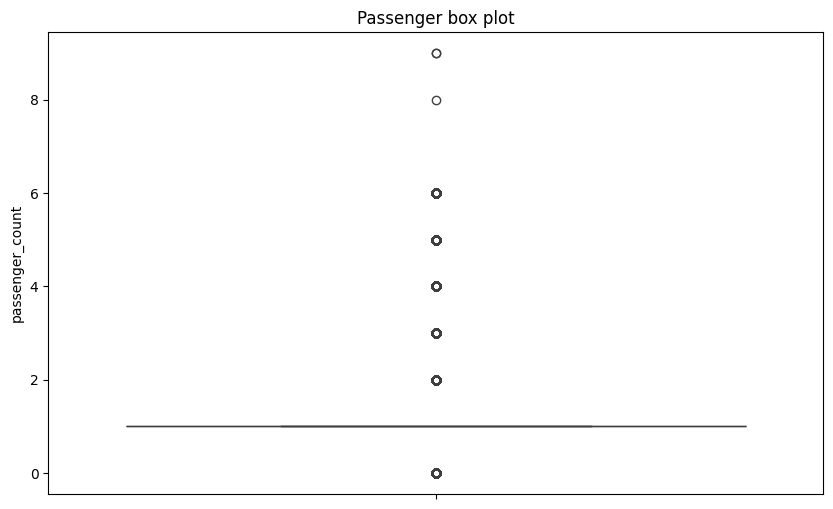

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['passenger_count'])
plt.title('Passenger box plot')
plt.show()
plt.savefig('../newcharts/passenger_boxplot.png')

**Explanation**

Analysing passenger_count column for its outliers and different count. It shows there lots of passenger count of 0. Also there are passenger count entries of more than 6, which would be handled in outlier analysis.

In [ ]:
df['trip_distance'].describe()

count    284460.000000
mean          4.035872
std         139.891866
min           0.000000
25%           1.040000
50%           1.790000
75%           3.400000
max       56823.800000
Name: trip_distance, dtype: float64

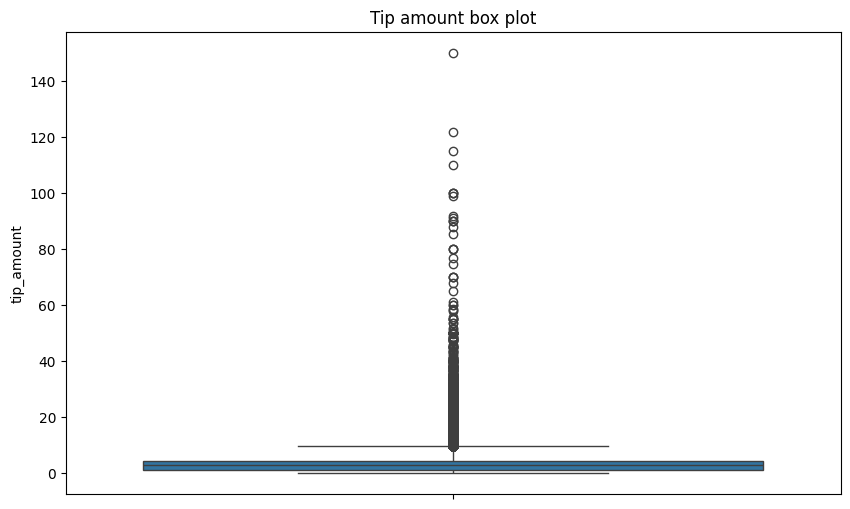

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['tip_amount'])
plt.title('Tip amount box plot')
plt.show()
plt.savefig('../newcharts/tip_amount_box_plot.png')

In [ ]:
df['tip_amount'].describe()

count    284460.000000
mean          3.547149
std           4.021471
min           0.000000
25%           1.000000
50%           2.850000
75%           4.450000
max         150.000000
Name: tip_amount, dtype: float64

In [ ]:
df.loc[df['tip_amount'] > 95]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1840959         2  2023-11-19 14:52:36   2023-11-19 15:37:56              1.0   
55545           2  2023-09-11 23:52:38   2023-09-11 23:55:37              1.0   
691680          1  2023-01-16 18:18:39   2023-01-16 18:19:00              1.0   
162181          1  2023-02-04 15:08:24   2023-02-04 15:16:41              0.0   
1710315         2  2023-08-27 02:41:33   2023-08-27 02:56:58              1.0   
39965           1  2023-09-09 01:04:43   2023-09-09 01:28:40              3.0   
101915          2  2023-09-20 14:42:26   2023-09-20 14:43:02              1.0   
801697          1  2023-07-09 12:08:25   2023-07-09 12:39:10              3.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1840959          10.36         1.0                  N           113   
55545             0.48         1.0                  N           261   
691680            0.00         1.0                  N           265   
162181            5.40         1.0                  N           197   
1710315           4.03         5.0                  N           249   
39965             4.60         1.0                  N            79   
101915            0.00         1.0                  N           265   
801697           10.30         5.0                  N           231   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1840959           116             1         49.9    0.0      0.5      122.00   
55545              87             1          5.1    1.0      0.5       99.00   
691680            265             1          3.0    0.0      0.5      100.00   
162181            132             1          0.0    0.0      0.0      110.00   
1710315           265             1        150.0    0.0      0.0       99.99   
39965              80             1         26.1    3.5      0.5      150.00   
101915            265             1          3.0    0.0      0.0       99.99   
801697            265             1          0.0    0.0      0.0      115.00   

         tolls_amount  improvement_surcharge  total_amount  \
1840959          0.00                    1.0        175.90   
55545            0.00                    1.0        109.10   
691680          14.75                    1.0        119.25   
162181           0.00                    1.0        111.00   
1710315         12.75                    1.0        263.74   
39965            0.00                    1.0        181.10   
101915           0.00                    1.0        103.99   
801697          21.75                    1.0        137.75   

         congestion_surcharge  airport_fee  
1840959                   2.5          0.0  
55545                     2.5          0.0  
691680                    0.0          0.0  
162181                    0.0          0.0  
1710315                   0.0          0.0  
39965                     2.5          0.0  
101915                    0.0          0.0  
801697                    0.0          0.0

**Explanation**

This shows that there are few entries in tip_amount which are quite high, around 150. Those looks like outlier as shown by the describe function as they are much more than 75 percentile of the data.
Also looking at those high values (>95), some of the entries has 0 fare but high tip amount. Others have fare amount which are lower than tip amount. Those also seems invalid.

In [ ]:
df.loc[df['trip_distance'] > 104.30]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1403046         2  2023-06-26 13:45:44   2023-06-26 13:51:12              2.0   
754056          2  2023-01-28 20:39:00   2023-01-28 20:59:00              1.0   
351026          2  2023-04-17 10:56:00   2023-04-17 11:25:00              1.0   
86063           1  2023-09-17 07:23:50   2023-09-17 07:48:20              1.0   
1484243         2  2023-12-10 17:10:00   2023-12-10 17:12:00              1.0   
1473161         2  2023-12-08 23:45:00   2023-12-09 00:14:00              1.0   
1420826         2  2023-06-30 23:40:00   2023-07-01 00:11:00              1.0   
1671675         1  2023-08-18 14:26:43   2023-08-18 15:04:09              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1403046        6262.99         1.0                  N            75   
754056        10451.89         1.0                  N           142   
351026         7914.69         1.0                  N            89   
86063         10452.60        99.0                  N           159   
1484243       33133.96         1.0                  N           142   
1473161       22414.00         1.0                  N            65   
1420826       20314.00         1.0                  N           237   
1671675       56823.80        99.0                  N            71   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1403046           238             1         7.90    0.0      0.5        1.88   
754056            224             0        19.94    0.0      0.5        4.79   
351026            227             0        19.85    0.0      0.5        0.00   
86063             254             1        27.50    0.0      0.5        0.00   
1484243           142             0        12.02    0.0      0.5        2.40   
1473161           188             0        21.69    0.0      0.5        4.64   
1420826           248             0        31.47    0.0      0.5        7.09   
1671675            39             1        18.50    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
1403046           0.0                    1.0         11.28   
754056            0.0                    1.0         28.73   
351026            0.0                    1.0         21.35   
86063             0.0                    1.0         29.00   
1484243           0.0                    1.0         18.42   
1473161           0.0                    1.0         27.83   
1420826           0.0                    1.0         42.56   
1671675           0.0                    1.0         20.00   

         congestion_surcharge  airport_fee  
1403046                   0.0          0.0  
754056                    2.5          0.0  
351026                    2.5          0.0  
86063                     0.0          0.0  
1484243                   2.5          0.0  
1473161                   2.5          0.0  
1420826                   2.5          0.0  
1671675                   0.0          0.0

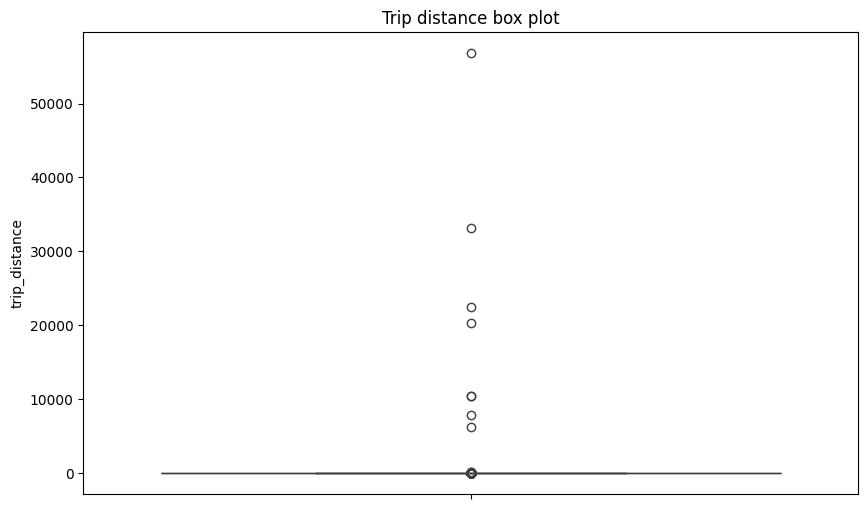

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['trip_distance'])
plt.title('Trip distance box plot')
plt.show()
plt.savefig('../newcharts/trip_distance_boxplot.png')

**Explanation**

Above analysis shows that there are few trip that has trip_distance of more than 104.3 **miles** looks like outlier. Looking at the data, these trips have trip_distance of as high as 56k miles, which are defnitely outlier given that it is a NYC city taxi.

In [ ]:
duration_df = df.copy()
duration_df['duration_mins']= (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
print(f"Getting more than 600m or 10h) of trip duration: {duration_df.loc[duration_df['duration_mins'] > 1000, 'duration_mins'].count()}")
print(f"Getting more than 300m or 5h) of trip duration: {duration_df.loc[duration_df['duration_mins'] > 300, 'duration_mins'].count()}")

Getting more than 600m or 10h) of trip duration: 209
Getting more than 300m or 5h) of trip duration: 253


In [ ]:
duration_df['duration_mins'].describe()

count    284460.000000
mean         17.476430
std          40.876562
min         -42.666667
25%           7.666667
50%          12.683333
75%          20.716667
max        3040.516667
Name: duration_mins, dtype: float64

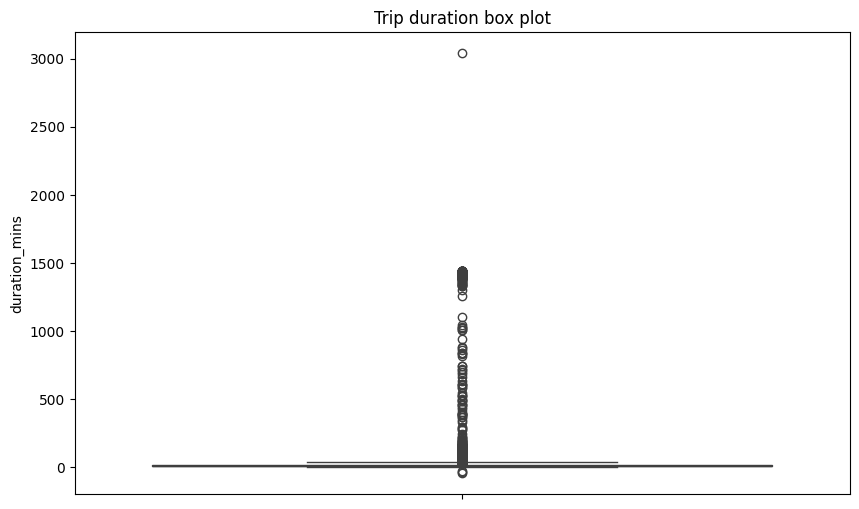

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=duration_df['duration_mins'])
plt.title('Trip duration box plot')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/trip_duration_boxplot.png')

**Explanation**

Trip duration of more than 10h are 209 and 5h are 253 trips. These looks outlier even with 5h duration within NYC.
Also describe on the trip duration shows that there are few trips which are more than 75 percentile of the data, which need to be handled in outlier handling.

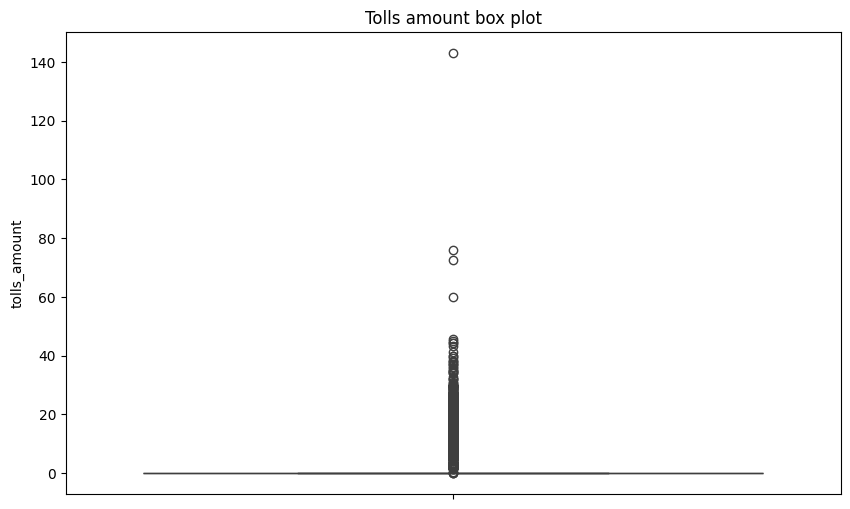

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['tolls_amount'])
plt.title('Tolls amount box plot')
plt.show()
plt.savefig('../newcharts/tolls_amount_boxplot.png')

In [ ]:
df['tolls_amount'].describe()

count    284460.000000
mean          0.593433
std           2.190028
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         143.000000
Name: tolls_amount, dtype: float64

**Explanation**

Above chart shows that there are tolls amount which are mostly 0, and few or them clustering between $0 to $20 also $40. But more than that looks outlier.

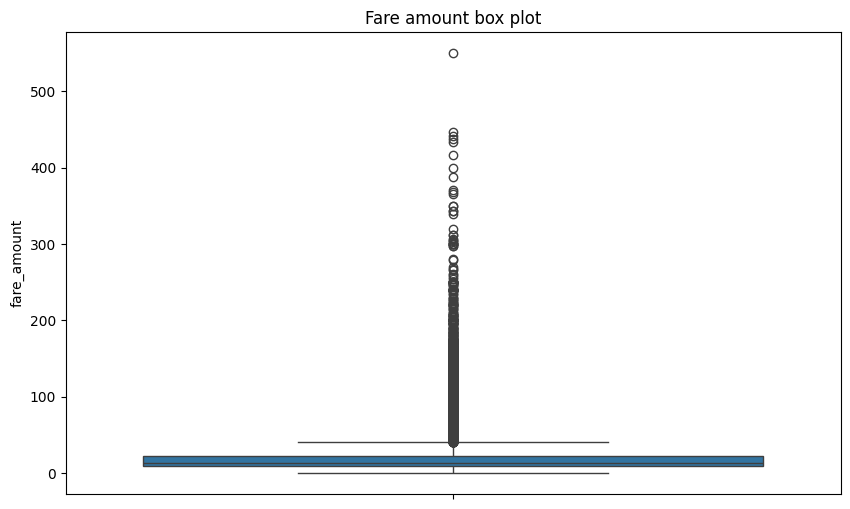

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['fare_amount'])
plt.title('Fare amount box plot')
plt.show()
plt.savefig('../newcharts/fare_amount_boxplot.png')

In [ ]:
df['fare_amount'].describe()

count    284460.000000
mean         19.837741
std          18.135992
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         550.000000
Name: fare_amount, dtype: float64

**Explanation**


Above lookup for 'fare_amount' column, box plot shows that there are clustering of the fare amount till \$300 and max values are hitting more than \$500. The describe output also shows that there are 75 percentile of data under \$22, and the max is \$550.

In [ ]:
df.groupby('payment_type')['total_amount'].sum()

payment_type
0     295282.18
1    6669956.94
2    1174191.94
3      28177.82
4      52103.69
Name: total_amount, dtype: float64

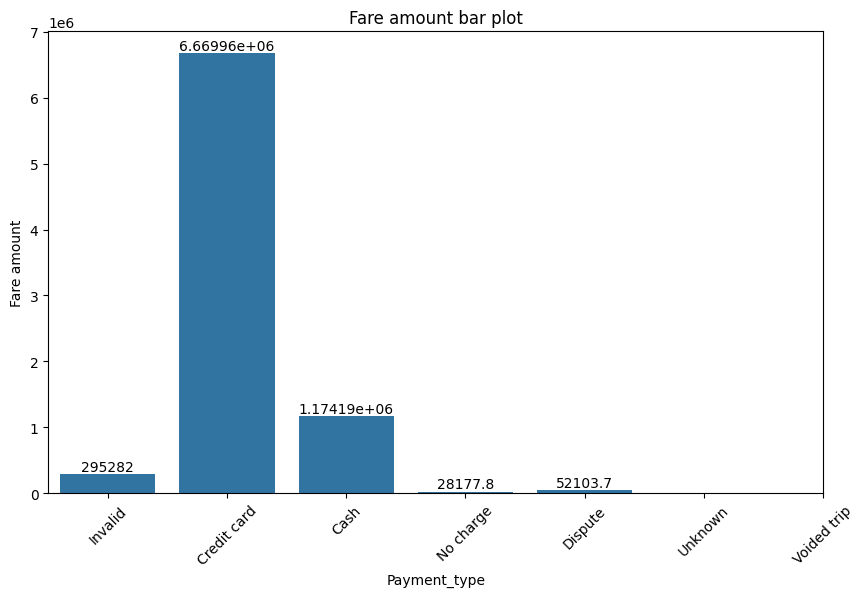

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['payment_type'], y=df['total_amount'], ci=None, estimator="sum")
plt.xlabel('Payment_type')
plt.ylabel('Fare amount')
plt.title('Fare amount bar plot')
plt.xticks([0,1,2,3,4,5,6], ['Invalid', 'Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

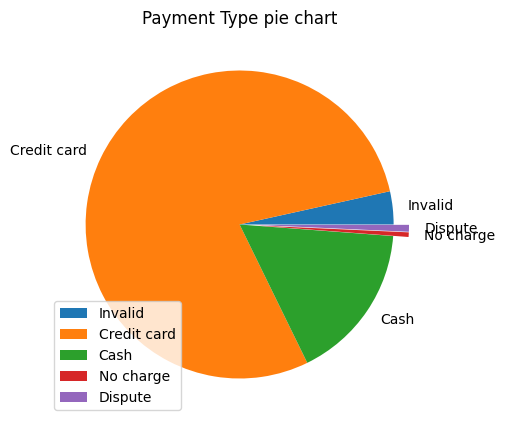

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(df['payment_type'].value_counts().sort_index(),
        labels=['Invalid', 'Credit card', 'Cash', 'No charge', 'Dispute'],
        explode = [0, 0, 0, 0.1, 0.1])
plt.title('Payment Type pie chart')
plt.legend(loc="best")
plt.show()
plt.savefig('../newcharts/payment_type_piechart.png')

**Explanation**

From the above charts it is understood that there are a few of payment_types of 0 but that is not a defined type as per data description. This need to be handled.

There are quite a few of payment done by credit card

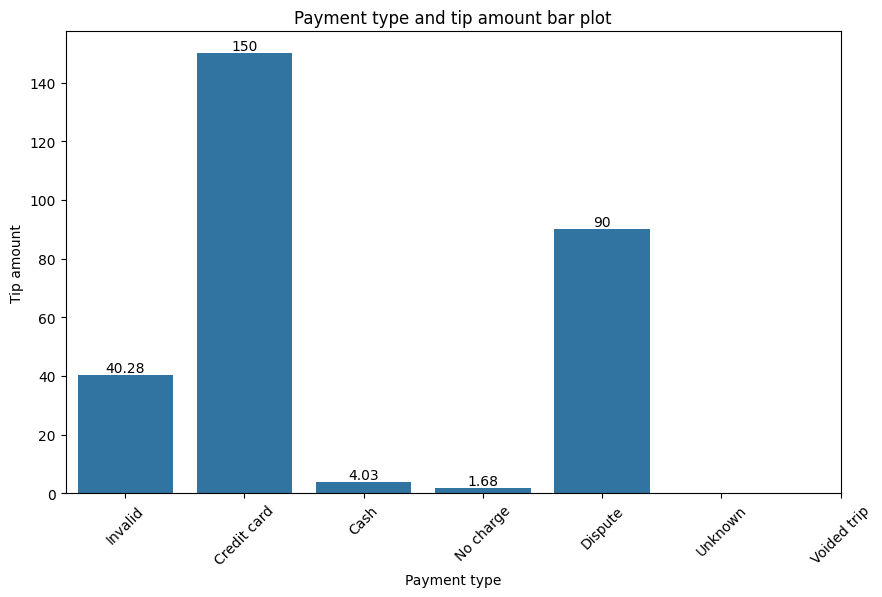

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['payment_type'], y=df['tip_amount'], ci=None, estimator="max")
plt.xlabel('Payment type')
plt.ylabel('Tip amount')
plt.title('Payment type and tip amount bar plot')
plt.xticks([0,1,2,3,4,5,6], ['Invalid', 'Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()
plt.savefig('../newcharts/payment_type_tip_amount_barplot.png')

In [ ]:
df.loc[(df['payment_type'] == 4) & (df['tip_amount'] > 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
19996          2  2023-02-13 09:42:35   2023-02-13 10:09:48              2.0   
198761         2  2023-03-11 08:17:00   2023-03-11 08:17:08              2.0   
230465         2  2023-06-21 13:39:56   2023-06-21 13:43:38              1.0   
250884         2  2023-12-22 19:51:36   2023-12-22 19:58:05              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
19996           12.75         1.0                  N           230   
198761           0.00         5.0                  N             7   
230465           0.54         1.0                  N           170   
250884           1.29         1.0                  N           239   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
19996            138             4         52.0    5.0      0.5       70.00   
198761             7             4         30.0    0.0      0.0        6.20   
230465           137             4          5.8    0.0      0.5       90.00   
250884           236             4          9.3    2.5      0.5        3.16   

        tolls_amount  improvement_surcharge  total_amount  \
19996           6.55                    1.0        137.55   
198761          0.00                    1.0         37.20   
230465          0.00                    1.0         99.80   
250884          0.00                    1.0         18.96   

        congestion_surcharge  Airport_fee  
19996                    2.5          0.0  
198761                   0.0          0.0  
230465                   2.5          0.0  
250884                   2.5          0.0

**Explanation**


The row with total amount of 99.80 shows a high tip amount of 90 and hence the entry was disputed.

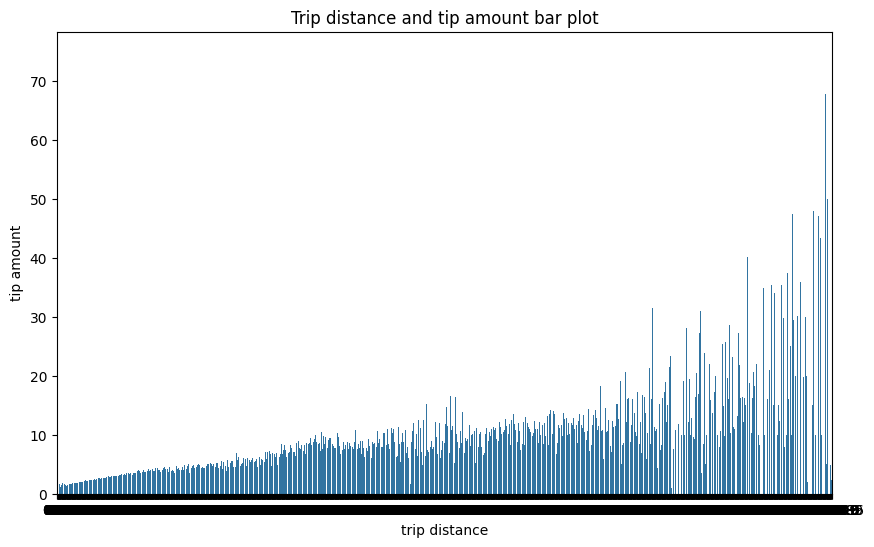

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['trip_distance'], y=df['tip_amount'], ci=None, estimator="mean")
plt.xlabel('trip distance')
plt.ylabel('tip amount')
plt.title('Trip distance and tip amount bar plot')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/trip_distance_tip_barplot.png')

**Explanation**

There are lots of tip payments done when the payment is done by credit card. Also there are high tip amount which went into dispute category, as they might have been an invalid tip payment amount. There are lots of payments which were in an invalid payment type of 0. This has to be handled differently to correctly assign that to a proper defined category based on the data descrption0.

Also the above chart shows high tip amount for long distance trips.

In [ ]:
## There are three vendor ID, 1, 2 and another invalid vendor id of 6.

df.groupby('VendorID')['VendorID'].count()

VendorID
1     74513
2    208092
6        60
Name: VendorID, dtype: int64

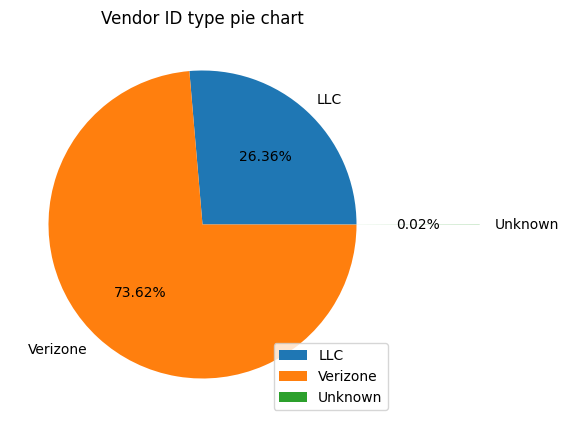

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(df['VendorID'].value_counts().sort_index(),
        labels=['LLC', 'Verizone', 'Unknown'],
        autopct='%1.2f%%',
        explode = [0, 0, 0.8])
plt.title('Vendor ID type pie chart')
plt.legend(loc="best")
plt.show()
plt.savefig('../newcharts/vendor_id_piechart.png')

**Explanation**

Above charts and data lookup shows that there are other vendorID in the dataset which is not defined in the data description, its id is 6. This can be removed from the data set for proper analysis.

In [ ]:
df.loc[(df['trip_distance'].between(0,4)) &
        (df['fare_amount'] >= 300) &
        (df['PULocationID'] != df['DOLocationID'])][['fare_amount', 'trip_distance', 'payment_type']]

fare_amount  trip_distance  payment_type
900159        300.0           0.01             1

**Analysis**

For trip distance between 0 to 4 miles and fare amount more than $300, this entry looks like an outlier where Pickup and drop location are different.

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns


**Explanation**

###From the above analyis there are outliers noticed in the data
* RatecodeID of 99
* Trip distance is more than 305 (sq miles radius of new york city)
* Trip distance is almost 0 and fare amount greater than 300
* Payment_type is 0
* Fare amount and trip distaces are 0 in 50 entries.
* Trip Duration value of 3000
* Tip amount 90 for fare amount of 0
* There are some vendorID with ID 6
* passenger_count greater than 6 are outliers

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [ ]:
# Difference between drop and pickup time is greater than 2hours and trip distance is less than 5 miles
df.loc[(((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600) > 5) &
       (df['trip_distance'] < 5)].shape[0]

193

**Analysis**

This shows that there are few entries which has the trip duration more than 5hours but trip_distance less than 5miles. These trips seems like invalid ones where the duration of trip doesn't correlate with the distance travelled during the start and end of trip duration.

There are around 193 entries which has trip duration of 5hr but trip distance less than 5miles. I am considering them as outliers are they seems to be trips which are not doing any distance coverup for a longer time and seems like invalid trips.

In [ ]:
# Handling payment_type 0. Making it 5 as it is the description of 'unknown' type.
# The payment_type value '0' is an undefined type.
df.loc[df["payment_type"] == 0, "payment_type"] = 5

In [ ]:
# Continue with outlier handling

# Trip distance greater than 104.5 are outliers. Newyork city radius is around 305 sq miles (web search),
# so using removing the outliers.
df=df[df['trip_distance'] < 305]

# RatecodeID of 99 is removed.
df=df[df['RatecodeID'] <= 6.0]

# Trip distance is almost 0 and fare amount greater than 300
df=df[~(df['trip_distance'].between(0, 1) &
        (df['fare_amount'] >= 300) &
        (df['PULocationID'] != df['DOLocationID']))]

# Handling trips which are taking more than 5hours and Trip distance less than 5miles.
df=df[~((((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600) > 5) &
       (df['trip_distance'] < 5))]

# Drop the vendor ID 6
df = df[df['VendorID'] != 6]


In [ ]:
# Do any columns need standardising?

# Using maps to keep standarized values for the categorical columns like store_and_fwd_flag, instead of numerical value of 0 / 1
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].map({"Y": 1, "N": 0})

# Similar thing can be done for the payment_type field
df["payment_type"] = df["payment_type"].map({1: "Credit card", 2: "Cash", 3: "No charge", 4: "Dispute", 5: "Unknown", 6: "Voided trip"})

# Adding two new columns which will be used to derive the day of week analysis and duration in minutes.
df['trip_pickup_dayofweek'] = (df['tpep_pickup_datetime']).dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['trip_duration_mins'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Adding pickup hour, month column as well for aiding in analysis
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour.astype('int')
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month.astype('int')

In [ ]:
def plot_two_df_box(original, transformed, columns):
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))
  original[columns].boxplot(ax=axes[0])
  axes[0].tick_params(axis='x', rotation=45)
  axes[0].set_title("Original Scale")

  transformed[columns].boxplot(ax=axes[1])
  axes[1].tick_params(axis='x', rotation=45)
  axes[1].set_title("Standardized Scale")
  plt.tight_layout()
  plt.show()

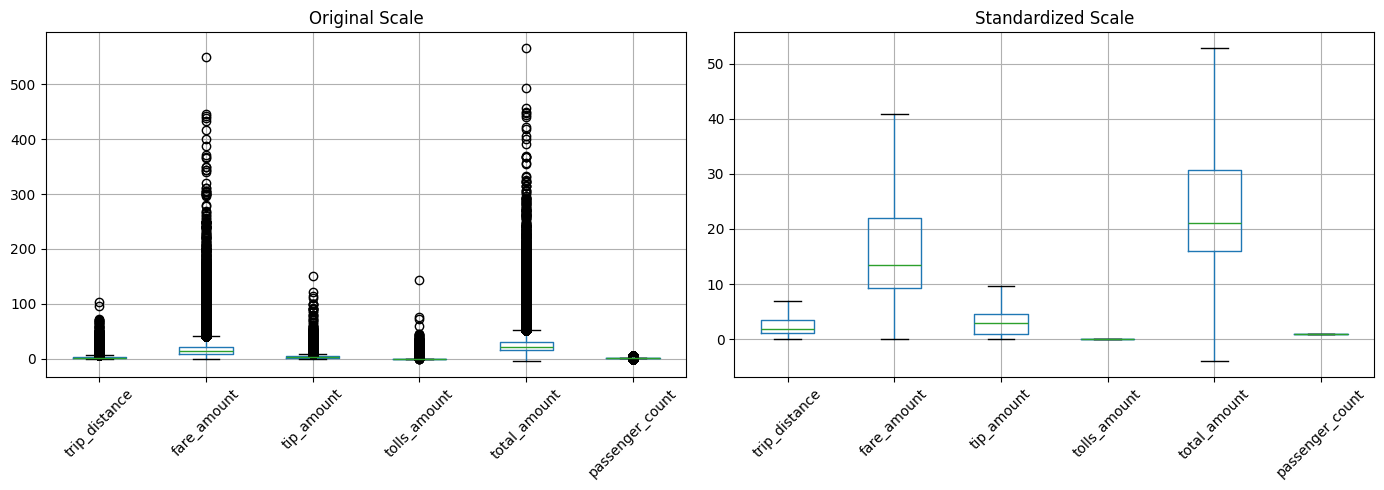

In [ ]:
numerical_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'passenger_count']
def clean_numeric_cols_using_iqr(df):
    df_iqr_copy = df.copy()

    for col in numerical_cols:
        q1 = df_iqr_copy[col].quantile(0.25)
        q3 = df_iqr_copy[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        df_iqr_copy[col] = df_iqr_copy[col].clip(lower=low, upper=high)
    return df_iqr_copy

cleaned_df = clean_numeric_cols_using_iqr(df)
plot_two_df_box(df, cleaned_df, numerical_cols)


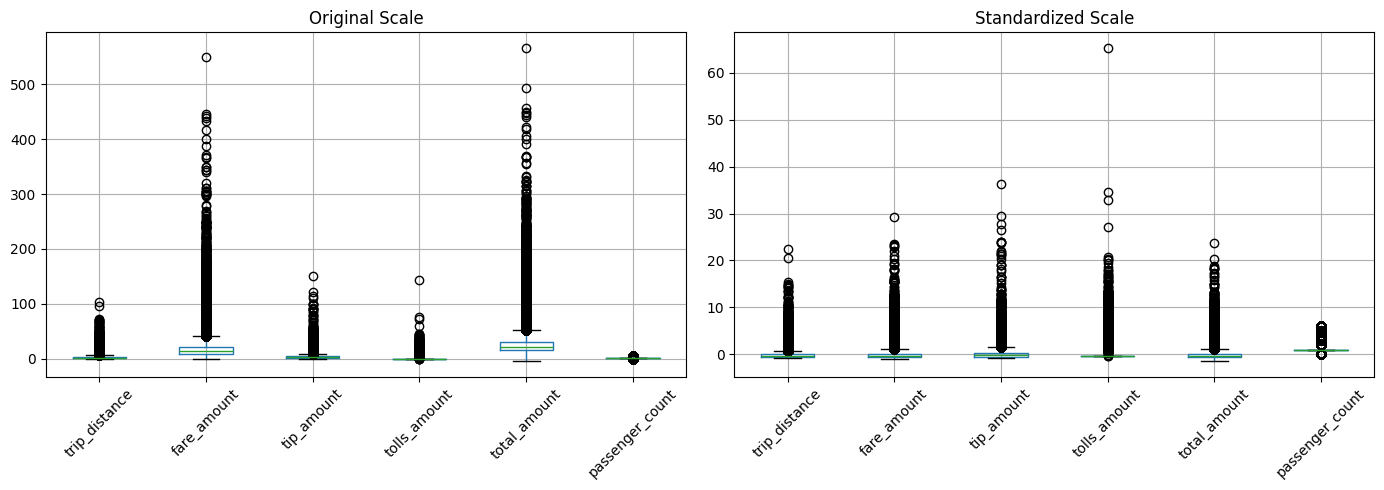

In [ ]:
from sklearn.preprocessing import StandardScaler

def clean_using_standard_scalar(df):
    df_ss_cleaned = df.copy()
    scaler = StandardScaler()
    numerical_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']
    df_ss_cleaned[numerical_cols] = scaler.fit_transform(df_ss_cleaned[numerical_cols])
    # for col in numerical_cols:
        # df_ss_cleaned[col] = scaler.fit_transform(df_ss_cleaned[col])
    return df_ss_cleaned

df_ss_cleaned = clean_using_standard_scalar(df)
plot_two_df_box(df, df_ss_cleaned, numerical_cols)

**Analysis**

After standardising using the standardisedScalar() the outlier data in the columns are in much more normalized scale than too many outliers in the original box plot.

Also from the above two standardizing techniques for the numerical columns, it shows that removing the outliers based on the standardisedScalar() method or the one based on quartile range looks similar.


In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                   0           132           181   
1           1.05         1.0                   0           239           142   
2           1.85         1.0                   0           114           164   
3           1.80         1.0                   0           239            75   
4           2.61         1.0                   0           186           113   

  payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0  Credit card  ...       12.35           0.0                    1.0   
1  Credit card  ...        3.33           0.0                    1.0   
2  Credit card  ...        3.28           0.0                    1.0   
3  Credit card  ...        4.60           0.0                    1.0   
4  Credit card  ...        4.34           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  trip_pickup_dayofweek  \
0         74.25                   0.0          0.0                 Sunday   
1         16.63                   2.5          0.0               Saturday   
2         19.68                   2.5          0.0                 Friday   
3         20.00                   2.5          0.0                 Monday   
4         26.04                   2.5          0.0              Wednesday   

   trip_duration_mins  pickup_hour pickup_month  
0           51.716667           14            6  
1            7.600000           11            9  
2            9.283333            2           10  
3            9.016667           12            7  
4           17.966667           15           11  

[5 rows x 23 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'trip_pickup_dayofweek',
 'trip_duration_mins',
 'pickup_hour',
 'pickup_month']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
# List of continuous (numerical) columns in the dataset
category_cols = ["VendorID", "PULocationID", "DOLocationID", "payment_type", "store_and_fwd_flag", "RatecodeID" ]

# Fare related columns
numerical_cols = ["passenger_count", "trip_distance", "fare_amount", "RatecodeID", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount","congestion_surcharge", "Airport_fee"]

# Time related columns
time_cols = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

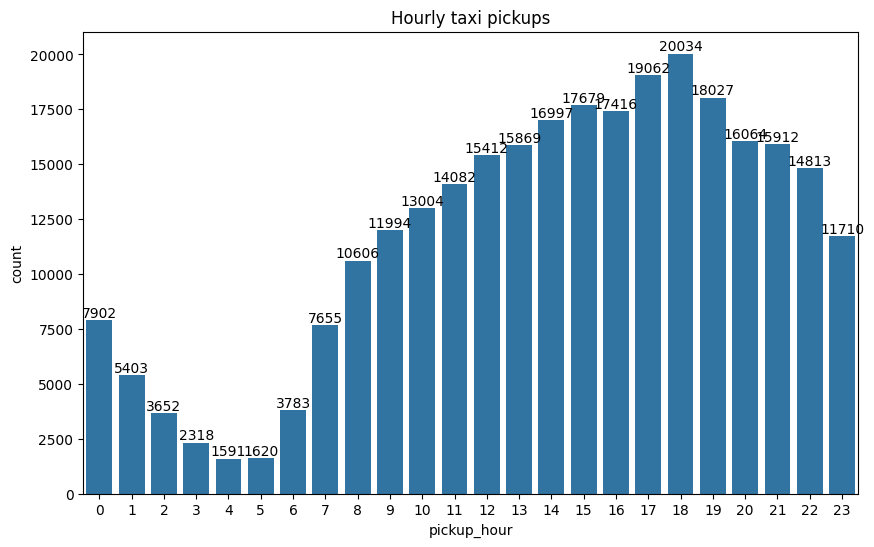

<Figure size 640x480 with 0 Axes>

In [ ]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='pickup_hour')
plt.title('Hourly taxi pickups')
ax.bar_label(ax.containers[0])
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/hourly_pickup.png')


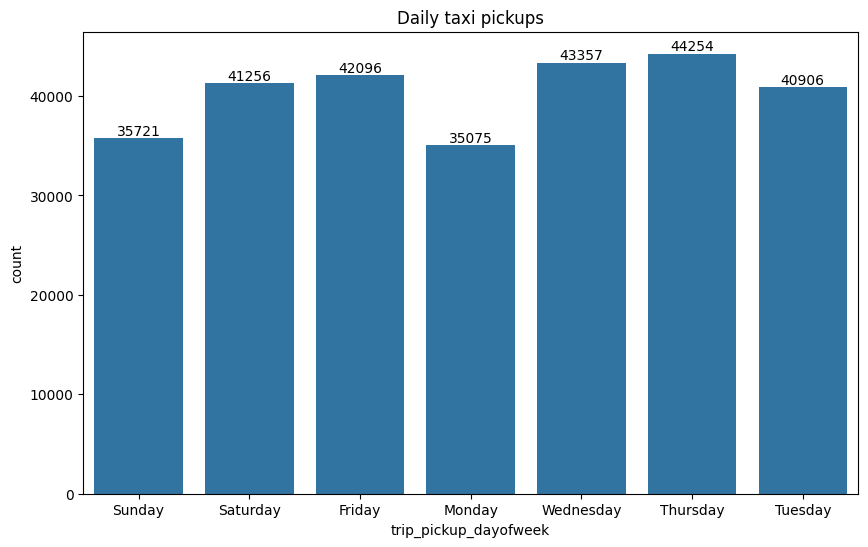

<Figure size 640x480 with 0 Axes>

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='trip_pickup_dayofweek')
plt.title('Daily taxi pickups')
ax.bar_label(ax.containers[0])
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/pickup_per_day_of_week.png')

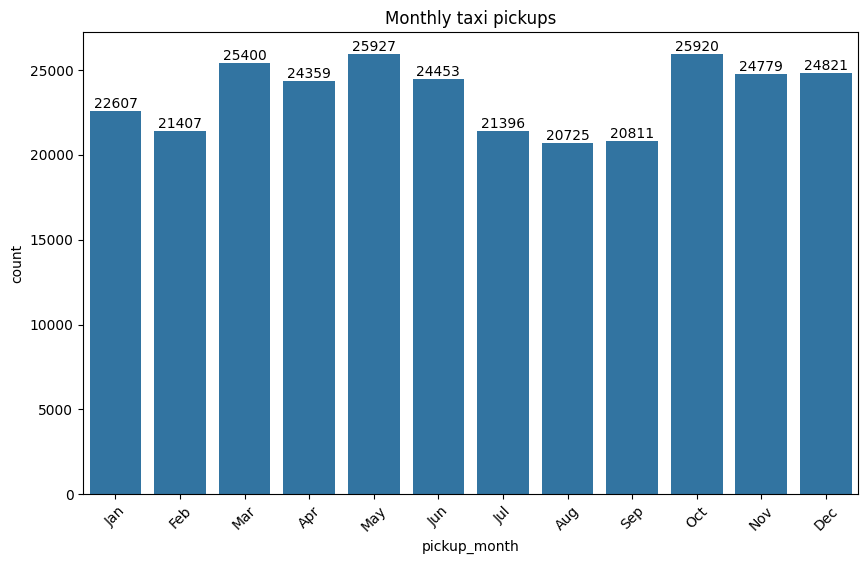

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show the monthly trends in pickups
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='pickup_month')
plt.title('Monthly taxi pickups')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax.bar_label(ax.containers[0])
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/montly_pickup.png')

**Analysis**

* **Hourly Pickup trend**
  
  Hourly pickup shows evening hours are much more busy 5PM to 7PM. Early morning hours 2AM to 6AM are low traffic hours with lowest hour reaching around 4AM and 5AM.
* **Daily Pickup trend**

  Weekday traffic analysis shows that Wednesday and Thursday are higher traffic days. Then Sunday and Monday shows lowest traffic days during the week.
* **Monthly pickup trend**

  Monthly revenue analysis shows higher traffic with highest in May, followed by October and March. Lower traffic months are seen in August, September followed by Feb.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
financial_params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
print(f"Financial params (zeros): \n{(df[financial_params] == 0).sum()}")
print(f"\nFinancial params (negatives): \n{(df[financial_params] < 0).sum()}")


Financial params (zeros): 
fare_amount         87
tip_amount       63378
total_amount        40
trip_distance     5533
dtype: int64

Financial params (negatives): 
fare_amount       0
tip_amount        0
total_amount     14
trip_distance     0
dtype: int64


**Explanation**

Found quite a few zero entries in the
* fare_amount         
* tip_amount
* total_amount
* trip_distance

There are few negative entries in total_amount, which need to be understood.

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
df_financials = df[financial_params]
df_financials.head()

fare_amount  tip_amount  total_amount  trip_distance
1399055         60.4       12.35         74.25          12.60
41775            9.3        3.33         16.63           1.05
1149477         11.4        3.28         19.68           1.85
805641          11.4        4.60         20.00           1.80
1774725         17.7        4.34         26.04           2.61

**Answer:**

Yes, it will be useful to seperate these financial parameter out to understand their zeros and negative entries.
* The trip distance and tip amount of zero is normal for a same location id and trips which may not have tips offered by customer. So those are valid entries and should be kept for analysis.
* Also if there are lots of trips with fare_amount is zero, those should be kept to understand the reason for such trips, to avoid losses if trip distance is also high.

In [ ]:
df_clean = df[(df['fare_amount'] >= 0) & (df['tip_amount'] >= 0) & (df['total_amount'] > 0)].copy()
df_clean.shape[0]

282551

**Explanation**

Taking the columns in the new dataframe which has fare amount greater than and equal to 0, tip_amount of greater than and equal to 0 and also total amount of greater than 0.


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

# 1. Removing the entries which has trip_distance is 0 and their pickup and drop zone / location is identical.
df_new = df_clean.copy()

df_new = df_new[~((df['trip_distance'] == 0) &
       (df['DOLocationID'] != df['PULocationID']))]

In [ ]:
df_new.loc[df_new['trip_distance'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
42             1  2023-04-28 11:43:27   2023-04-28 11:52:03              1.0   
406            2  2023-12-21 03:07:59   2023-12-21 03:08:10              1.0   
413            2  2023-07-11 20:59:25   2023-07-11 20:59:30              2.0   
500            1  2023-12-20 15:41:50   2023-12-20 15:42:11              1.0   
531            1  2023-01-19 01:14:06   2023-01-19 01:14:58              0.0   
...          ...                  ...                   ...              ...   
284051         2  2023-08-10 12:21:46   2023-08-10 12:28:38              1.0   
284120         2  2023-05-04 23:35:43   2023-05-04 23:35:50              1.0   
284150         2  2023-11-08 23:29:23   2023-11-08 23:29:33              1.0   
284234         2  2023-04-23 13:54:40   2023-04-23 13:54:48              1.0   
284333         2  2023-09-15 11:20:23   2023-09-15 11:20:43              1.0   

        trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  \
42                0.0         1.0                   0           145   
406               0.0         5.0                   0           265   
413               0.0         2.0                   0           264   
500               0.0         2.0                   0           193   
531               0.0         5.0                   0           162   
...               ...         ...                 ...           ...   
284051            0.0         1.0                   0           264   
284120            0.0         1.0                   0           132   
284150            0.0         5.0                   0            79   
284234            0.0         5.0                   0            65   
284333            0.0         1.0                   0           193   

        DOLocationID payment_type  ...  tip_amount  tolls_amount  \
42               145         Cash  ...        0.00           0.0   
406              265  Credit card  ...        0.00           0.0   
413              264         Cash  ...        0.00           0.0   
500              193         Cash  ...        0.00           0.0   
531              162  Credit card  ...        0.00           0.0   
...              ...          ...  ...         ...           ...   
284051           264  Credit card  ...        1.74           0.0   
284120           132         Cash  ...        0.00           0.0   
284150            79  Credit card  ...        3.57           0.0   
284234            65  Credit card  ...       16.60           0.0   
284333           193    No charge  ...        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
42                        1.0         10.10                   0.0   
406                       1.0         71.00                   0.0   
413                       1.0         71.50                   0.0   
500                       1.0         71.50                   0.0   
531                       1.0         19.00                   0.0   
...                       ...           ...                   ...   
284051                    1.0         10.44                   0.0   
284120                    1.0          7.25                   0.0   
284150                    1.0         15.47                   2.5   
284234                    1.0         99.60                   0.0   
284333                    1.0          4.50                   0.0   

        airport_fee  trip_pickup_dayofweek  trip_duration_mins  pickup_hour  \
42             0.00                 Friday            8.600000           11   
406            0.00               Thursday            0.183333            3   
413            0.00                Tuesday            0.083333           20   
500            0.00              Wednesday            0.350000           15   
531            0.00               Thursday            0.866667            1   
...             ...                    ...                 ...          ..

**Explanation**


There are quite a few entries which has trip_distance as 0 still and those are from the same location, which is expected.

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_new.groupby('pickup_month')['total_amount'].sum().reset_index(name='revenue')
monthly_revenue


pickup_month    revenue
0              1  609354.24
1              2  580260.38
2              3  716168.31
3              4  699589.37
4              5  751220.89
5              6  719781.66
6              7  612560.84
7              8  601319.05
8              9  609438.01
9             10  750296.16
10            11  706769.44
11            12  715106.93

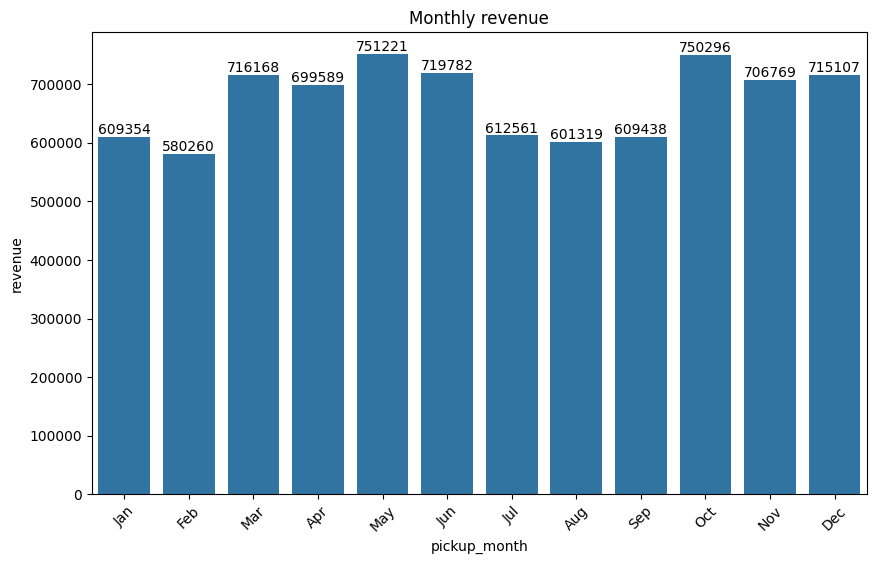

In [ ]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=monthly_revenue.pickup_month, y=monthly_revenue.revenue)
ax.bar_label(ax.containers[0])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Monthly revenue')
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/monthly_revenue.png')

**Explanation**

Monthly revenue shows interesting data. The month of May has highest revenue, followed by Oct. This could be due to holiday seasons in October, with not much clear explanation for month of May. Also the month of Feb and Jan are quite low and that could be due to winter season.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
df_new['pickup_quarter'] = df_new['pickup_month'].apply(lambda x: (x-1)//3 + 1)
pickup_by_quaters = df_new.groupby('pickup_quarter')['total_amount'].sum().reset_index(name='revenue')
pickup_by_quaters


pickup_quarter     revenue
0               1  1905782.93
1               2  2170591.92
2               3  1823317.90
3               4  2172172.53

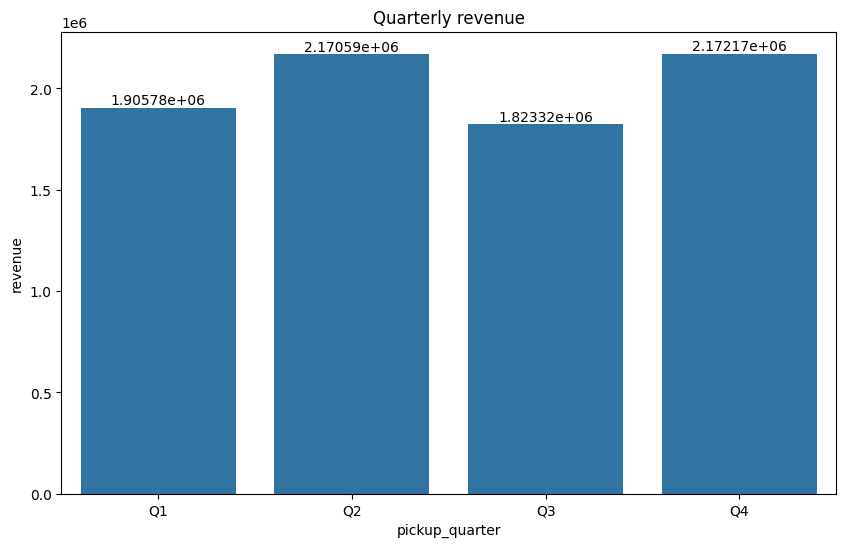

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=pickup_by_quaters.pickup_quarter, y=pickup_by_quaters.revenue)
ax.bar_label(ax.containers[0])
plt.xticks([0,1,2,3], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Quarterly revenue')
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/quarterly_revenue.png')

**Explanation**

Quaterly revenue shows higher income in the Q4 followed by Q2. There is a considerable dip in Q3 in comparison with other quarters.

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Text(0.5, 1.0, 'Trip distance vs Fare amount')

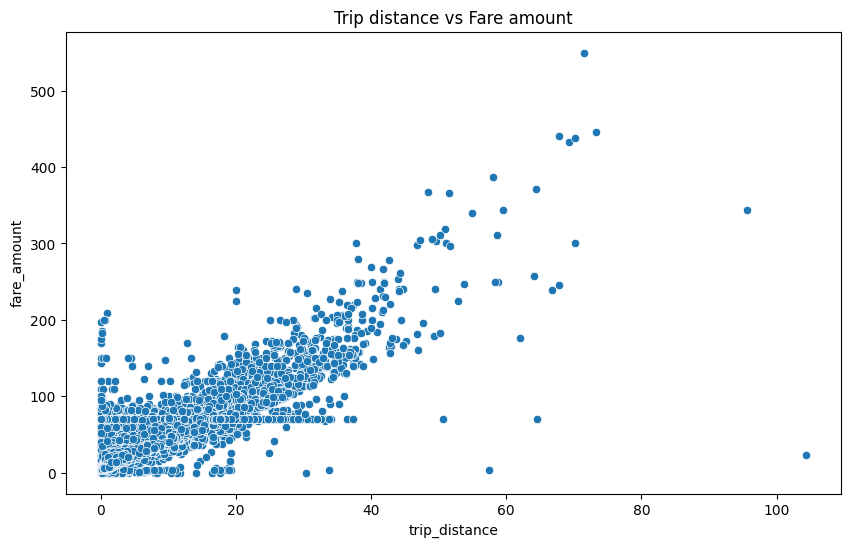

In [ ]:
df_no_zero_distance = df_new[df_new['trip_distance'] != 0]
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=df_no_zero_distance['trip_distance'], y=df_no_zero_distance['fare_amount'])
plt.title('Trip distance vs Fare amount')

**Explanation**

This scatter plot shows that fare_amount is increasing with trip distance. There are quite a few of fare_amount which are marked zeros, which are also showing up in the graph. Also there are quite a few of trips which are in the range of trip distance less than 40miles. Only a few of trips have higher trip distance of 60miles and only a couple of them around 100miles.

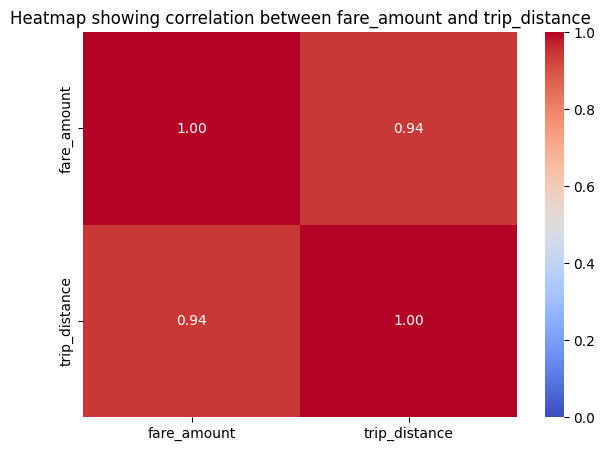

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show how trip fare is affected by distance
df_no_zero_distance = df_new[df_new['trip_distance'] != 0]
correlation_matrix = df_no_zero_distance[['fare_amount', 'trip_distance']].corr()
plt.figure(figsize = (7, 5))
sns.heatmap(data = correlation_matrix, annot=True, fmt='0.2f', cmap="coolwarm", cbar=True, vmin=0)
plt.title('Heatmap showing correlation between fare_amount and trip_distance')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/fare_amount_trip_distance_heatmap.png')



**Analysis**

#### The correlation heatmap between fare_amount and trip_distance is highly correlated. It shows that with increase of trip_distance the fare_amount also increases which is quite implicit too.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

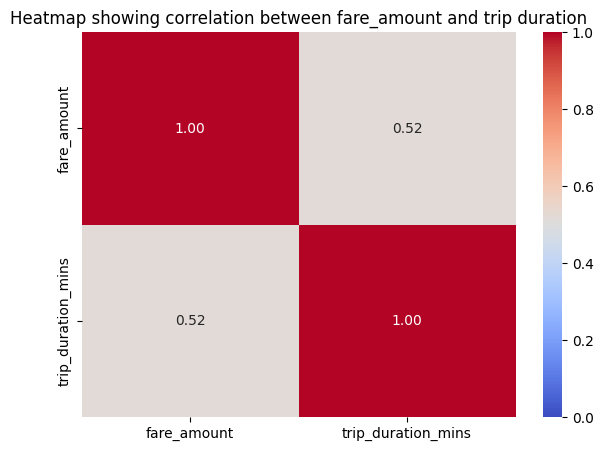

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show relationship between fare and trip duration

correlation_matrix = df_new[['fare_amount', 'trip_duration_mins']].corr()
plt.figure(figsize = (7, 5))
sns.heatmap(data = correlation_matrix, annot=True, fmt='0.2f', cmap="coolwarm", cbar=True, vmin=0)
plt.title('Heatmap showing correlation between fare_amount and trip duration')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/fare_amount_trip_duration_heatmap.png')



**Analysis**

#### The above chart shows that the fare_amount and trip_duration are moderately correlated.

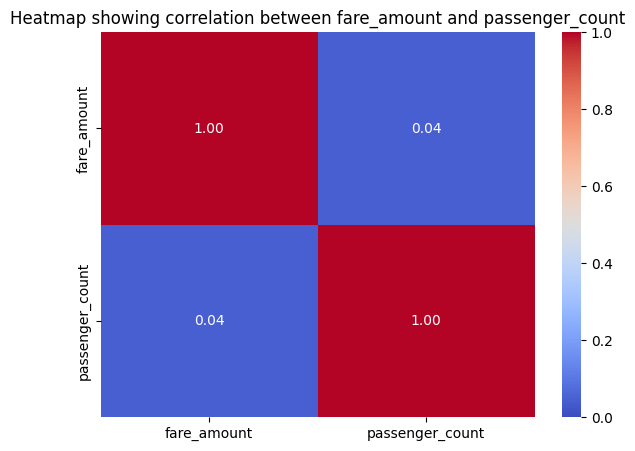

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show relationship between fare and number of passengers
correlation_matrix = df_new[['fare_amount', 'passenger_count']].corr()
plt.figure(figsize = (7, 5))
sns.heatmap(data = correlation_matrix, annot=True, fmt='0.2f', cmap="coolwarm", cbar=True, vmin = 0)
plt.title('Heatmap showing correlation between fare_amount and passenger_count')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/fare_amount_passenger_count_heatmap.png')



**Analysis**

#### This figure shows that the fare_amount and passenger_count are having less correlation.

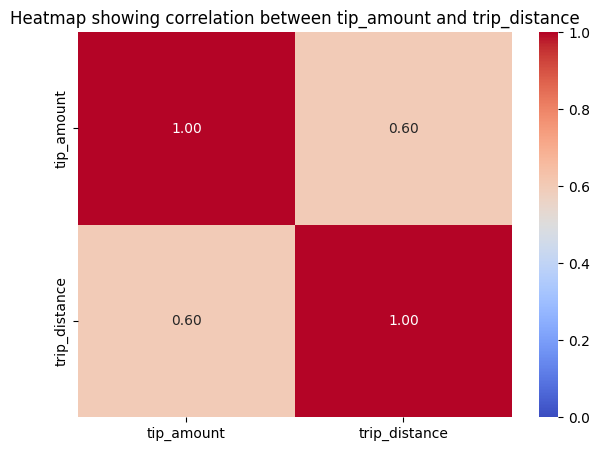

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show relationship between tip and trip distance
correlation_matrix = df_new[['tip_amount', 'trip_distance']].corr()
plt.figure(figsize = (7, 5))
sns.heatmap(data = correlation_matrix, annot=True, fmt='0.2f', cmap="coolwarm", cbar=True, vmin=0)
plt.title('Heatmap showing correlation between tip_amount and trip_distance')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/tip_amount_trip_distance_heatmap.png')



**Analysis**

#### This figure shows that the tip_amount and trip_distance are having moderate correlation.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).
df_payment_type = df_new.groupby('payment_type')['total_amount'].agg(['count', 'sum', 'mean']).rename(columns={'sum': 'amount', 'mean': 'avg_amount'}).reset_index()
df_payment_type



payment_type   count      amount  avg_amount
0         Cash   46807  1167942.88   24.952312
1  Credit card  221632  6585989.23   29.715877
2      Dispute    1995    51331.90   25.730276
3    No charge    1332    27958.82   20.990105
4      Unknown    7669   238642.45   31.117805

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



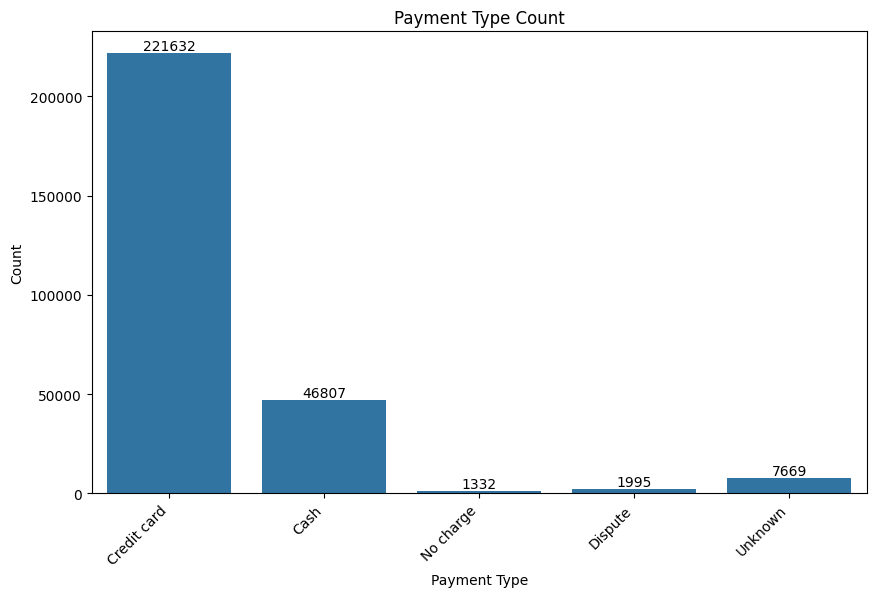

In [ ]:
# Filter and reorder the payment types as requested
ordered_payment_types = ['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown']
df_payment_type_filtered = df_payment_type[df_payment_type['payment_type'].isin(ordered_payment_types)]
df_payment_type_filtered['payment_type'] = pd.Categorical(df_payment_type_filtered['payment_type'], categories=ordered_payment_types, ordered=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='payment_type', y='count', data=df_payment_type_filtered)
ax.bar_label(ax.containers[0])
plt.title('Payment Type Count')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Explanation**

This shows that credit card payment type is used maximum number of times. There are a few cash payment type entries as well. Then the next highest is the unknown type which is also considerable count.

There are few dispute entries present which is for payments which were disputed later.

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

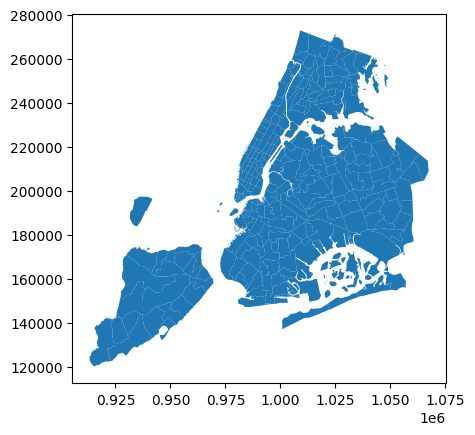

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
df_merged = pd.merge(df_new, zones, left_on='PULocationID', right_on='LocationID', how='left')
df_merged.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                   0           132           181   
1           1.05         1.0                   0           239           142   
2           1.85         1.0                   0           114           164   
3           1.80         1.0                   0           239            75   
4           2.61         1.0                   0           186           113   

  payment_type  ...  trip_duration_mins  pickup_hour  pickup_month  OBJECTID  \
0  Credit card  ...           51.716667           14             6     132.0   
1  Credit card  ...            7.600000           11             9     239.0   
2  Credit card  ...            9.283333            2            10     114.0   
3  Credit card  ...            9.016667           12             7     239.0   
4  Credit card  ...           17.966667           15            11     186.0   

   Shape_Leng  Shape_Area                          zone  LocationID  \
0    0.245479    0.002038                   JFK Airport       132.0   
1    0.063626    0.000205         Upper West Side South       239.0   
2    0.031727    0.000047       Greenwich Village South       114.0   
3    0.063626    0.000205         Upper West Side South       239.0   
4    0.024696    0.000037  Penn Station/Madison Sq West       186.0   

     borough                                           geometry  
0     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
1  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...  
2  Manhattan  POLYGON ((986306.712 203122.786, 986300.242 20...  
3  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...  
4  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
df_location_based_trip_count = (
    df_merged.groupby('LocationID')['PULocationID']
             .size()
             .reset_index(name='trip_count')
             .sort_values(by='trip_count', ascending=False)
             .reset_index(drop=True)
)
df_location_based_trips = df_location_based_trip_count.merge(zones, on='LocationID', how='left')
df_location_based_trips.head()


LocationID  trip_count  OBJECTID  Shape_Leng  Shape_Area  \
0       132.0       14491       132    0.245479    0.002038   
1       237.0       13094       237    0.042213    0.000096   
2       161.0       13052       161    0.035804    0.000072   
3       236.0       11951       236    0.044252    0.000103   
4       162.0        9920       162    0.035270    0.000048   

                    zone    borough  \
0            JFK Airport     Queens   
1  Upper East Side South  Manhattan   
2         Midtown Center  Manhattan   
3  Upper East Side North  Manhattan   
4           Midtown East  Manhattan   

                                            geometry  
0  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
1  POLYGON ((993633.442 216961.016, 993507.232 21...  
2  POLYGON ((991081.026 214453.698, 990952.644 21...  
3  POLYGON ((995940.048 221122.92, 995812.322 220...  
4  POLYGON ((992224.354 214415.293, 992096.999 21...

**Explanation**

The locationId of 132 (JFK Airport, Queens) shows highest number of pickups, followed by 237 (Upper East Side South, Manhattan) and 161 (Midtown, Manhattan) location.

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

# Calculate trip counts per PULocationID from df_merged
trip_counts = df_merged.groupby('LocationID')['PULocationID'].count().rename('trip_count')

# Merge these trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_counts, on='LocationID', how='left')

# Fill any NaN values in 'trip_count' with 0 (for zones with no recorded trips)
zones['trip_count'] = zones['trip_count'].fillna(0).astype(int)

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0          26  
1           0  
2           1  
3         370  
4           0

<Axes: >

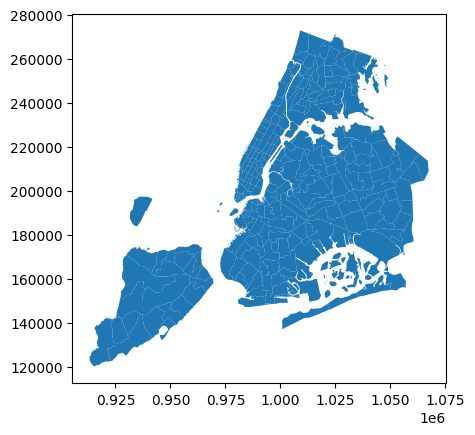

In [ ]:
zones.plot()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

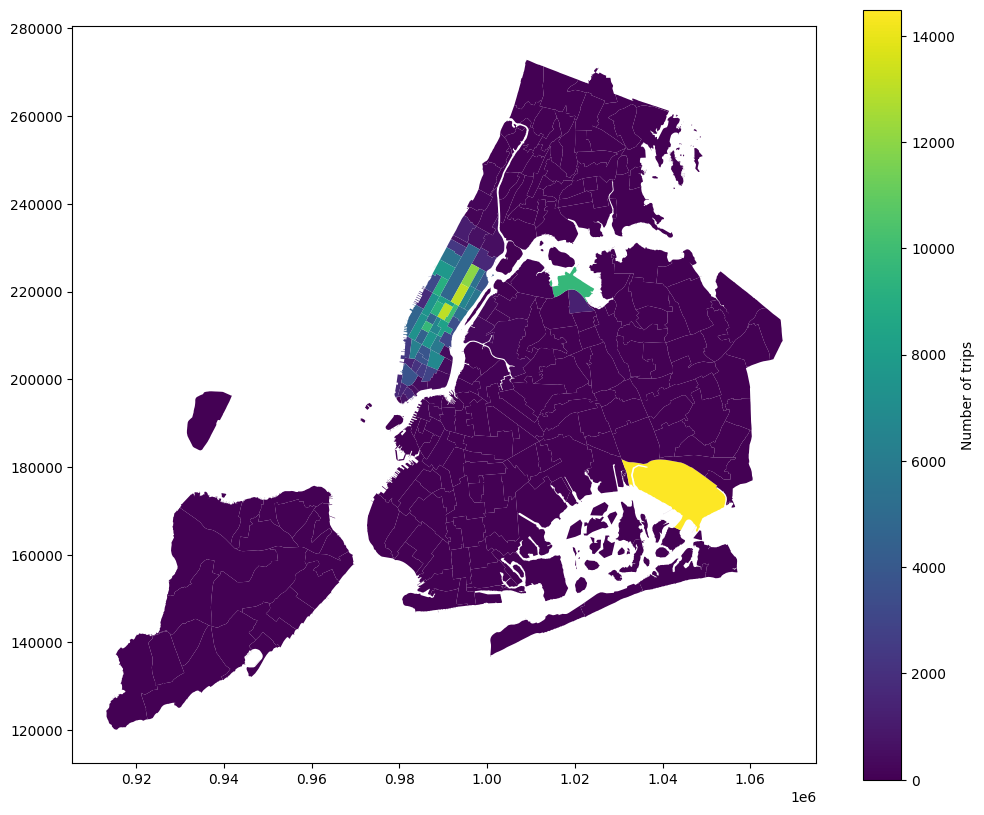

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of trips", 'orientation': "vertical"})
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/zones_with_trips.png')


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_df_sorted = zones.sort_values(by='trip_count', ascending=False)
zones_df_sorted.head()


OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  trip_count  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...       14491  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...       13094  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...       13052  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...       11951  
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...        9920

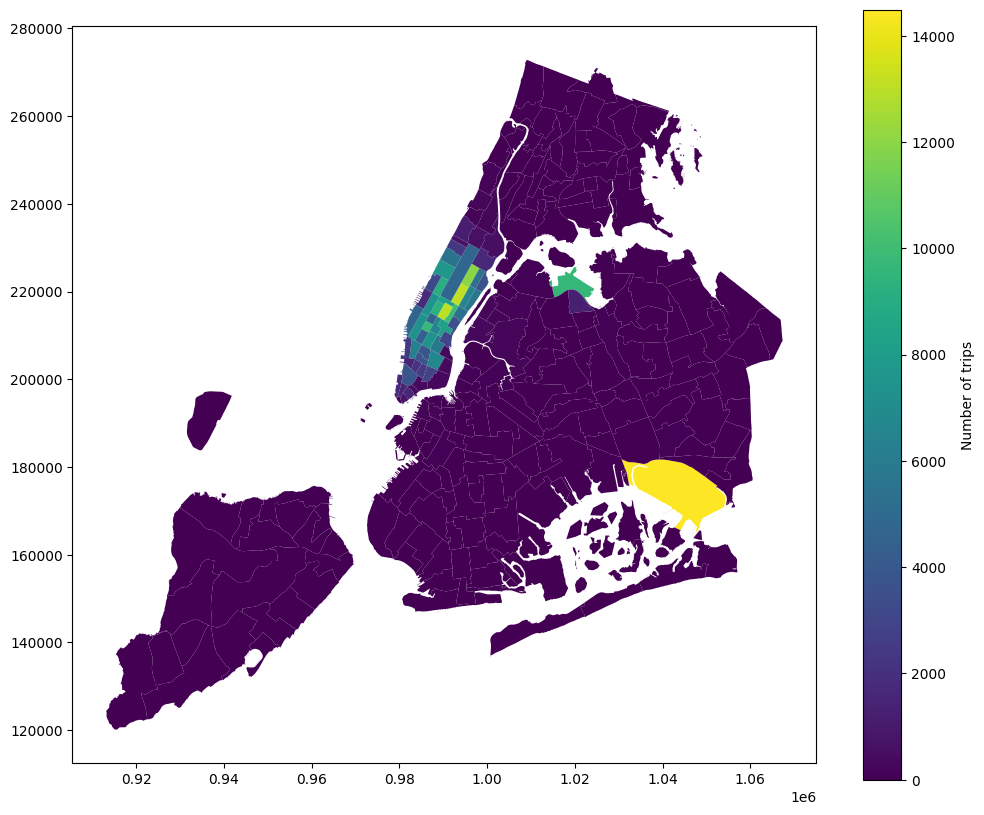

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones_df_sorted.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of trips", 'orientation': "vertical"})
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/zones_with_trips_sorted.png')

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
df_speed_mph = df_merged.groupby(['pickup_hour', 'PULocationID', 'DOLocationID']).agg(distance_avg =('trip_distance', 'mean'),
                     duration_avg=('trip_duration_mins', 'mean'),
                     trip_count=('trip_distance', 'size')).reset_index()
df_speed_mph['speed_mph'] = df_speed_mph['distance_avg'] / (df_speed_mph['duration_avg']/60)
df_speed_mph = df_speed_mph[df_speed_mph['trip_count'] >= 10]
df_speed_mph.head()

pickup_hour  PULocationID  DOLocationID  distance_avg  duration_avg  \
122            0            48            48      0.481765      3.306863   
124            0            48            50      0.833636      5.312121   
125            0            48            68      1.376087      7.286957   
129            0            48            79      3.145882     16.541176   
141            0            48           116      6.293000     17.268333   

     trip_count  speed_mph  
122          17   8.741180  
124          11   9.415859  
125          23  11.330549  
129          17  11.411095  
141          10  21.865457

In [ ]:
df_speed_mph.sort_values(by='speed_mph', ascending=False).head(10)


pickup_hour  PULocationID  DOLocationID  distance_avg  duration_avg  \
46216           18           265           265      1.853000      0.301667   
35360           15           193           193      2.640000      0.469231   
34757           15           145           145      0.911111      0.496296   
34411           15           138           138      1.742000      2.216667   
28555           13           145           145      0.963636      1.365909   
16762            9           132           265     32.113889     48.796296   
60932           23           132           263     19.130000     29.385000   
61133           23           138           265     22.548182     34.759091   
2777             0           265           265      1.479167      2.343056   
22630           11           145           145      0.925000      1.473333   

       trip_count   speed_mph  
46216          10  368.552486  
35360          13  337.573770  
34757          18  110.149254  
34411          10   47.151880  
28555          22   42.329451  
16762          18   39.487287  
60932          10   39.060745  
61133          11   38.921930  
2777           12   37.877890  
22630          20   37.669683

How does identifying high-traffic, high-demand routes help us?

**Analysis**

By grouping in terms of pickup_hour, it will enable us compare the travel speed between two zones during during different hour of day. This would help us in understanding the congestion situation between the route and help in applying that during peak hours.

This also provide us insight on high traffic routes and suggesting in providing more cabs in that area.




**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

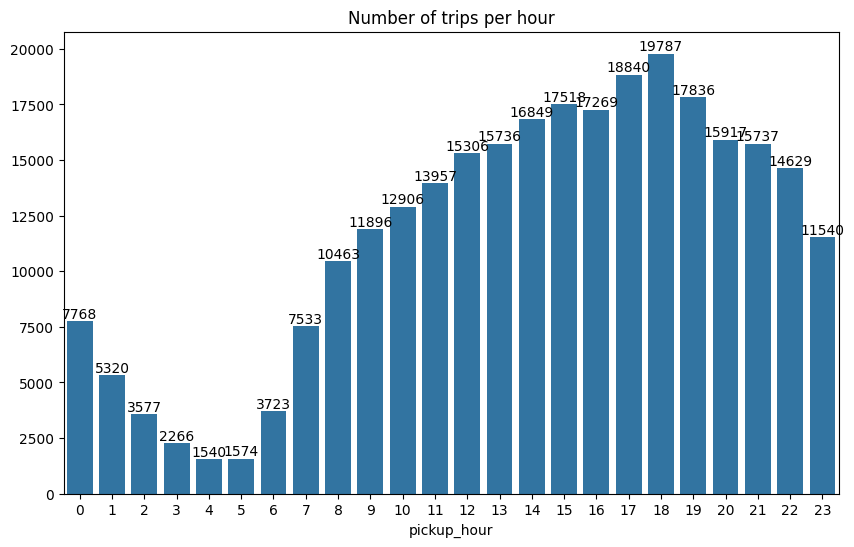

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
df_merged.groupby('pickup_hour')['PULocationID'].count()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_merged.groupby('pickup_hour')['PULocationID'].count().index, y=df_merged.groupby('pickup_hour')['PULocationID'].count().values)
ax.bar_label(ax.containers[0])
plt.title('Number of trips per hour')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/number_of_trips_per_hour.png')


**Analysis**

The busiest hour of day is coming as 18:00 hour which as 19899 trip.  

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# In the sampling done did sample of 5% of sample out of each parquet file. Then from the overall sample
# took 15% sample to get the data in the range of 250k to 300k rows. So overall sample fraction is 0.75%

df_scld_up_by_sampl_frac = df_merged.groupby('pickup_hour').size().reset_index(name='trip_count')
df_scld_up_by_sampl_frac['est_trip_count'] = (df_scld_up_by_sampl_frac['trip_count'] / 0.0075).round().astype(int)
df_scld_up_by_sampl_frac.sort_values(by='trip_count', ascending=False).head()


pickup_hour  trip_count  est_trip_count
18           18       19785         2638000
17           17       18839         2511867
19           19       17835         2378000
15           15       17517         2335600
16           16       17266         2302133

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

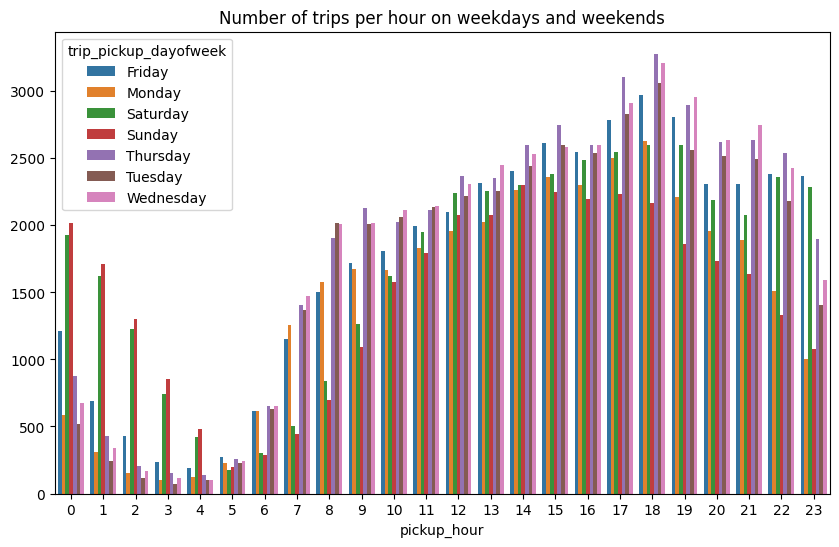

<Figure size 640x480 with 0 Axes>

In [ ]:
# Compare traffic trends for the week days and weekends
pickup_hour_dow = df_merged.groupby(['pickup_hour', 'trip_pickup_dayofweek'])['PULocationID'].count()
pickup_hour_dow.head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=pickup_hour_dow.index.get_level_values(0), y=pickup_hour_dow.values, hue=pickup_hour_dow.index.get_level_values(1))
# ax.bar_label(ax.containers[0])
plt.title('Number of trips per hour on weekdays and weekends')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/number_of_trips_per_hour_on_weekdays_and_weekends.png')

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**Explanation**

From the above graph, we can determine that:

* Weekdays are having higher traffic during morning hours of day increasing from 0700 (7AM) onwards and goes on till late evening till 2000hr

* Weekends (sat and sun) have higher traffic in early morning from 00hr to 0400hr.

* Also we see higher late night traffic 2200hr on saturdays.

* During weekdays thrusdays and weds have higher traffic than other weekdays.

* The peak traffic hours of 1700hr and 1800hr also shows that wed and thursdays have highest traffic

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

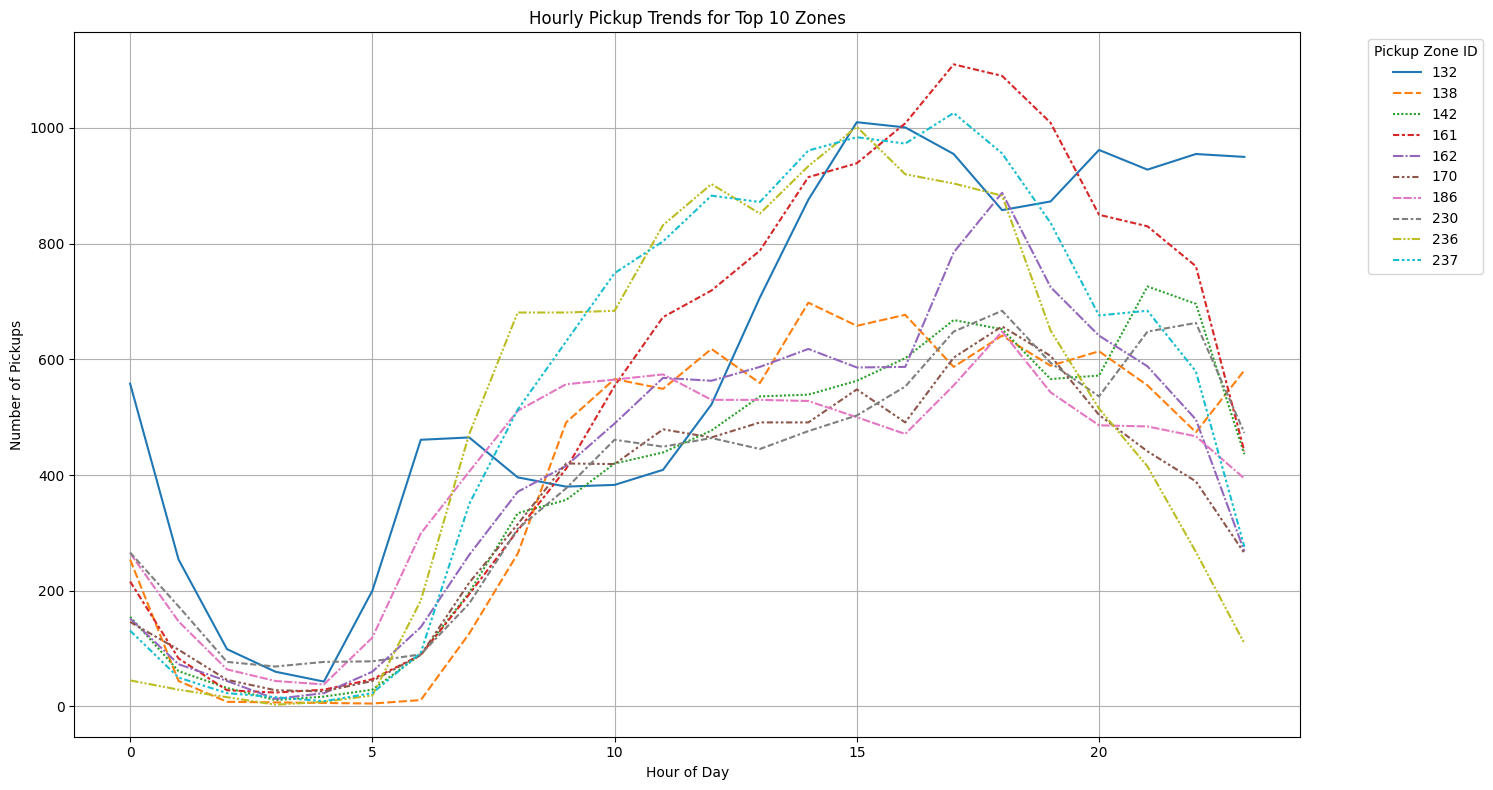

<Figure size 640x480 with 0 Axes>

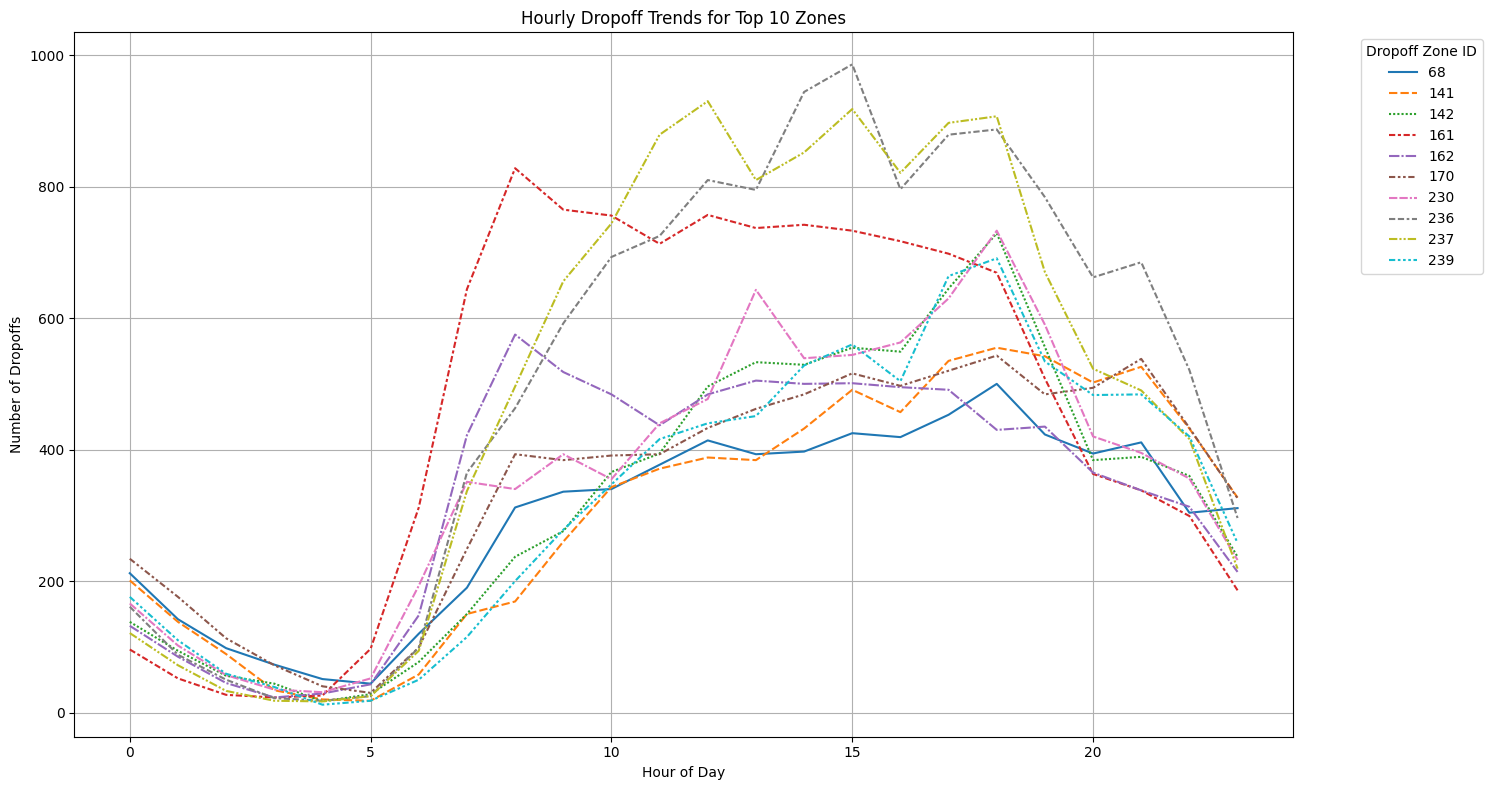

<Figure size 640x480 with 0 Axes>

In [ ]:
# Find top 10 pickup zones overall
top_10_pickup_zones = df_merged['PULocationID'].value_counts().nlargest(10).index

# Find top 10 dropoff zones overall
top_10_dropoff_zones = df_merged['DOLocationID'].value_counts().nlargest(10).index

# Filter data for these top zones
df_top_pickup = df_merged[df_merged['PULocationID'].isin(top_10_pickup_zones)]
df_top_dropoff = df_merged[df_merged['DOLocationID'].isin(top_10_dropoff_zones)]

# Group by hour and zone for pickups
hourly_top_pickup_trends = df_top_pickup.groupby(['pickup_hour', 'PULocationID']).size().unstack(fill_value=0)

# Group by hour and zone for dropoffs
hourly_top_dropoff_trends = df_top_dropoff.groupby(['pickup_hour', 'DOLocationID']).size().unstack(fill_value=0)

# Plotting hourly trends for top 10 pickup zones
plt.figure(figsize=(15, 8))
sns.lineplot(data=hourly_top_pickup_trends)
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/top_10_pickup_zones_hourly_trends.png')

# Plotting hourly trends for top 10 dropoff zones
plt.figure(figsize=(15, 8))
sns.lineplot(data=hourly_top_dropoff_trends)
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title='Dropoff Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/top_10_dropoff_zones_hourly_trends.png')

**Analysis:**

####Hourly Pickup Trends (Figure 1):

There's a clear dip in pickups across all top zones during the early morning hours (around 3 AM to 5 AM).
Pickups gradually increase from the morning, reaching a significant peak in the evening (typically between 4 PM and 7 PM) for most central Manhattan zones like Midtown Center (161), Upper East Side South (237), and Upper East Side North (236).
JFK Airport (Zone 132) shows a consistently high number of pickups throughout the day, with a notable morning peak and then sustained high activity into the evening.

####Hourly Dropoff Trends (Figure 2):

Similar to pickups, dropoffs are lowest in the very early morning.
Dropoffs also show a build-up during the day, with many zones experiencing their highest dropoff volumes in the late afternoon and early evening, aligning with the end of the workday.
Specific zones like Midtown Center (161), JFK Airport (132), and other Manhattan areas maintain high dropoff activity, indicating constant movement of passengers to and from these key locations.

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:

df_pickup_counts = df_merged.groupby('PULocationID').size().reset_index(name='pickup_count')
df_pickup_counts['type'] = 'pickup'
df_dropoff_counts = df_merged.groupby('DOLocationID').size().reset_index(name='dropoff_count')
df_dropoff_counts['type'] = 'dropoff'

pickup_dropoff_ratios = df_pickup_counts.merge(df_dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')
pickup_dropoff_ratios['zone_id'] = pickup_dropoff_ratios['PULocationID'].combine_first(
    pickup_dropoff_ratios['DOLocationID']
)
pickup_dropoff_ratios = pickup_dropoff_ratios.groupby('zone_id').agg({'pickup_count': 'sum', 'dropoff_count': 'sum'}).reset_index()
pickup_dropoff_ratios['pickup_dropoff_ratio'] = pickup_dropoff_ratios['pickup_count'] / pickup_dropoff_ratios['dropoff_count']

pickup_zone_dropoff_pickup_ratio_merged = pickup_dropoff_ratios.merge(zones[['LocationID', 'zone', 'borough']], left_on='zone_id', right_on='LocationID')
pickup_zone_dropoff_pickup_ratio_merged.head()

print("Top 10 pickup / dropoff ratio")
display(pickup_zone_dropoff_pickup_ratio_merged.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10))

print("Bottom 10 pickup / dropoff ratio ")
# display which are more than 0
display(pickup_zone_dropoff_pickup_ratio_merged[pickup_zone_dropoff_pickup_ratio_merged['pickup_dropoff_ratio'] > 0].sort_values(by='pickup_dropoff_ratio', ascending=True).head(10))



Top 10 pickup / dropoff ratio


zone_id  pickup_count  dropoff_count  pickup_dropoff_ratio  LocationID  \
69      70.0        1259.0            177              7.112994          70   
125    132.0       14491.0           3394              4.269593         132   
131    138.0        9628.0           3664              2.627729         138   
179    186.0        9701.0           6094              1.591894         186   
107    114.0        3781.0           2701              1.399852         114   
42      43.0        4794.0           3452              1.388760          43   
241    249.0        6258.0           4792              1.305927         249   
155    162.0        9920.0           7987              1.242018         162   
97     100.0        4560.0           3748              1.216649         100   
154    161.0       13052.0          11029              1.183426         161   

                             zone    borough  
69                  East Elmhurst     Queens  
125                   JFK Airport     Queens  
131             LaGuardia Airport     Queens  
179  Penn Station/Madison Sq West  Manhattan  
107       Greenwich Village South  Manhattan  
42                   Central Park  Manhattan  
241                  West Village  Manhattan  
155                  Midtown East  Manhattan  
97               Garment District  Manhattan  
154                Midtown Center  Manhattan

Bottom 10 pickup / dropoff ratio 


zone_id  pickup_count  dropoff_count  pickup_dropoff_ratio  LocationID  \
148    155.0           1.0             56              0.017857         155   
249    257.0           2.0            106              0.018868         257   
164    171.0           1.0             47              0.021277         171   
244    252.0           1.0             41              0.024390         252   
227    235.0           1.0             37              0.027027         235   
90      92.0           5.0            175              0.028571          92   
112    119.0           1.0             35              0.028571         119   
200    208.0           1.0             34              0.029412         208   
124    131.0           2.0             67              0.029851         131   
28      29.0           1.0             33              0.030303          29   

                                  zone   borough  
148             Marine Park/Mill Basin  Brooklyn  
249                    Windsor Terrace  Brooklyn  
164                 Murray Hill-Queens    Queens  
244                         Whitestone    Queens  
227  University Heights/Morris Heights     Bronx  
90                            Flushing    Queens  
112                         Highbridge     Bronx  
200       Schuylerville/Edgewater Park     Bronx  
124                    Jamaica Estates    Queens  
28                      Brighton Beach  Brooklyn

**Analysis**

This shows the zone 70 which is East Elmhurst, Queens has highest pickups to drop off ratio.

With this top ten location which has higher pickup, we should try to have high taxi availability in this areas.

For the location which has higher dropoff location, we should look for move them to the higher pickup ratios. This is to get quicker turn around of the trip assignments and not loose on trip assignments due to no available taxis in the areas with higher picksup. This would provide option to increase the revenue.


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_mask = (df_merged['pickup_hour'] >= 23) | (df_merged['pickup_hour'] <= 5)
df_night_hours = df_merged[night_hours_mask].copy()

df_night_hours['PULocationID'] = df_night_hours['PULocationID'].astype(int)
df_night_hours['DOLocationID'] = df_night_hours['DOLocationID'].astype(int)

df_night_hour_pickup_counts = df_night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
df_night_hour_pickup_counts
df_night_hour_dropoff_counts = df_night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')
df_night_hour_dropoff_counts

df_night_pickup_named = df_night_hour_pickup_counts.merge(zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID')
df_night_dropoff_named = df_night_hour_dropoff_counts.merge(zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID')

df_top10_night_pickup_zones = df_night_pickup_named.sort_values(by='pickup_count', ascending=False).head(10)
df_top10_night_dropoff_zones = df_night_dropoff_named.sort_values(by='dropoff_count', ascending=False).head(10)

print("Top 10 night hour pickup zones")
display(df_top10_night_pickup_zones)

print("Top 10 night hour dropoff zones")
display(df_top10_night_dropoff_zones)

Top 10 night hour pickup zones


PULocationID  pickup_count  LocationID                          zone  \
46             79          2443          79                  East Village   
75            132          2185         132                   JFK Airport   
152           249          1962         249                  West Village   
26             48          1606          48                  Clinton East   
88            148          1534         148               Lower East Side   
65            114          1348         114       Greenwich Village South   
138           230          1208         230     Times Sq/Theatre District   
110           186          1069         186  Penn Station/Madison Sq West   
100           164           938         164                 Midtown South   
38             68           914          68                  East Chelsea   

       borough  
46   Manhattan  
75      Queens  
152  Manhattan  
26   Manhattan  
88   Manhattan  
65   Manhattan  
138  Manhattan  
110  Manhattan  
100  Manhattan  
38   Manhattan

Top 10 night hour dropoff zones


DOLocationID  dropoff_count  LocationID                           zone  \
75             79           1300          79                   East Village   
44             48           1035          48                   Clinton East   
158           170            986         170                    Murray Hill   
64             68            911          68                   East Chelsea   
98            107            853         107                       Gramercy   
129           141            819         141                Lenox Hill West   
230           249            788         249                   West Village   
244           263            729         263                 Yorkville West   
136           148            704         148                Lower East Side   
211           229            682         229  Sutton Place/Turtle Bay North   

       borough  
75   Manhattan  
44   Manhattan  
158  Manhattan  
64   Manhattan  
98   Manhattan  
129  Manhattan  
230  Manhattan  
244  Manhattan  
136  Manhattan  
211  Manhattan

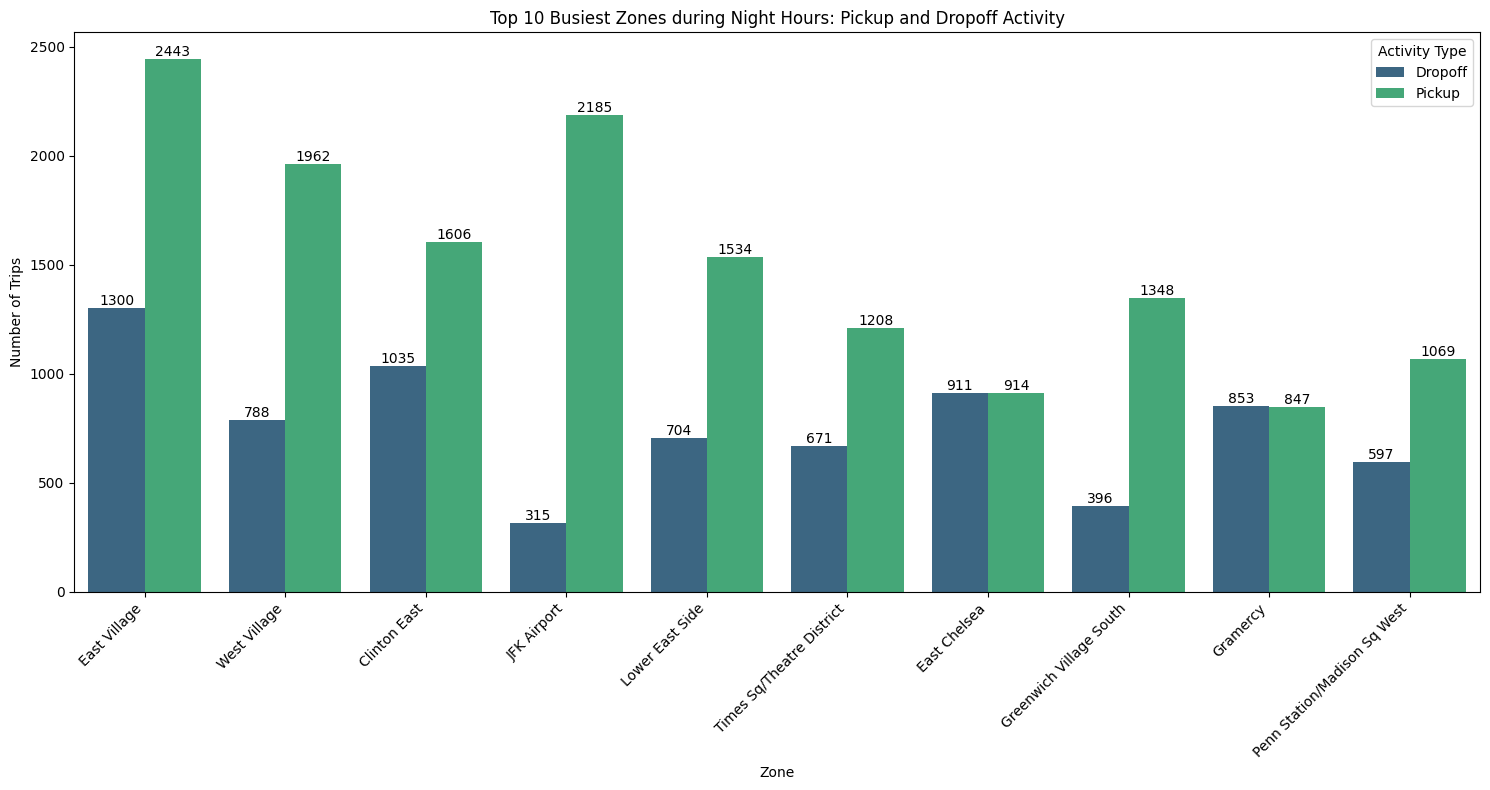

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate pickup counts per zone during night hours
pickup_activity_night = df_night_hours.groupby('PULocationID').size().reset_index(name='count')
pickup_activity_night['type'] = 'Pickup'
pickup_activity_night = pickup_activity_night.rename(columns={'PULocationID': 'LocationID'})

# Calculate dropoff counts per zone during night hours
dropoff_activity_night = df_night_hours.groupby('DOLocationID').size().reset_index(name='count')
dropoff_activity_night['type'] = 'Dropoff'
dropoff_activity_night = dropoff_activity_night.rename(columns={'DOLocationID': 'LocationID'})

# Concatenate night pickup and dropoff activities
combined_activity_night = pd.concat([pickup_activity_night, dropoff_activity_night], ignore_index=True)

# Merge with zones to get names
combined_activity_night_named = pd.merge(combined_activity_night, zones[['LocationID', 'zone', 'borough']], on='LocationID', how='left')

# Calculate total activity (sum of pickups and dropoffs) for each zone during night hours
total_activity_per_zone_night = combined_activity_night_named.groupby('LocationID')['count'].sum().sort_values(ascending=False)

# Get the top 10 LocationIDs based on total night activity
top_10_zone_ids_night = total_activity_per_zone_night.head(10).index

# Filter the combined night activity for these top 10 zones
df_top_10_activity_night = combined_activity_night_named[combined_activity_night_named['LocationID'].isin(top_10_zone_ids_night)]

# Sort by total activity for consistent plotting order
df_top_10_activity_night['total_activity'] = df_top_10_activity_night['LocationID'].map(total_activity_per_zone_night)
df_top_10_activity_night = df_top_10_activity_night.sort_values(by=['total_activity', 'type'], ascending=[False, True])

plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_top_10_activity_night, x='zone', y='count', hue='type', dodge=True, palette='viridis')

plt.title('Top 10 Busiest Zones during Night Hours: Pickup and Dropoff Activity')
plt.xlabel('Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0], fmt='%.0f')
ax.bar_label(ax.containers[1], fmt='%.0f')
plt.legend(title='Activity Type')
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/top_10_busiest_zones_night_activity.png')

**Explanation**

The above chart shows the comparison of top 10 pickup and dropoff activity for a particular location.

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

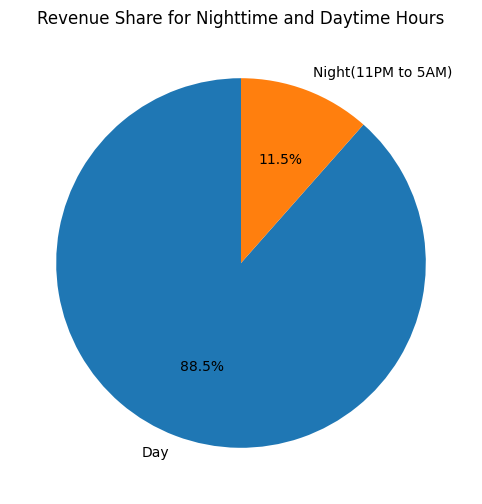

In [ ]:
# Filter for night hours (11 PM to 5 AM)

df_night = df_merged.copy()
df_night['night_hour'] = df_night['pickup_hour'].isin([23, 0, 1, 2, 3, 4]).copy()

df_night_grouped = df_night.groupby('night_hour')['total_amount'].sum().reset_index(name='revenue')
df_night_grouped['share_proportion'] = df_night_grouped['revenue'] / df_night_grouped['revenue'].sum() * 100
df_night_grouped['period'] = df_night_grouped['night_hour'].map({True: 'Night(11PM to 5AM)', False: 'Day'})
df_night_grouped.head()

plt.figure(figsize=(10, 6))
plt.pie(df_night_grouped['share_proportion'], labels=df_night_grouped['period'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share for Nighttime and Daytime Hours')
plt.show()



**Analysis**

Day time traffic revenue is 88.5% and night time traffic revenue is very low with 11.5%.

Using this data, we can reduce the taxi by giving instructions to reduce the number of taxis. This would help drivers in maximising their earning as well as customers would be less in the night hours. So they can focus on starting the run during early morning time after 5AM.

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

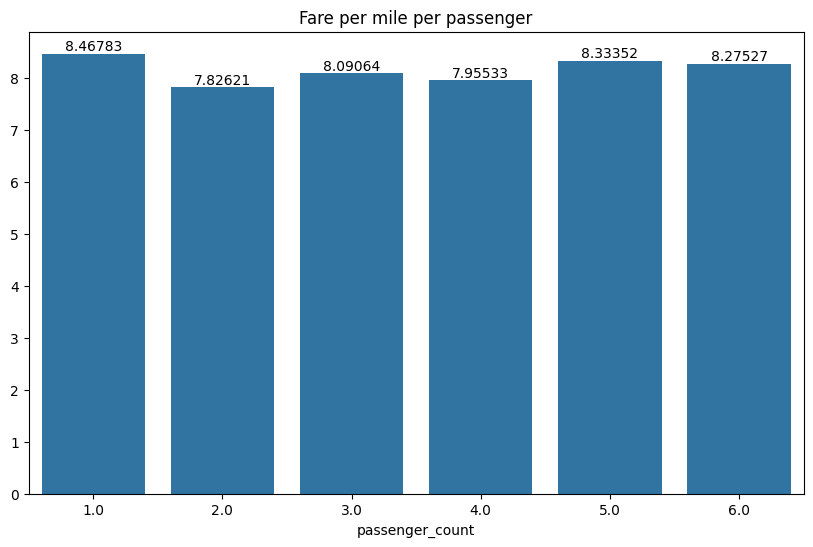

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
# Want to remove the passenger count 0
df_merged_non_zero_psgr = df_merged[df_merged['passenger_count'] != 0]
df_fare_per_mile_per_psgr = df_merged_non_zero_psgr.groupby('passenger_count')['total_amount'].sum() / df_merged_non_zero_psgr.groupby('passenger_count')['trip_distance'].sum()
df_fare_per_mile_per_psgr.head()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_fare_per_mile_per_psgr.index, y=df_fare_per_mile_per_psgr.values)
ax.bar_label(ax.containers[0])
plt.title('Fare per mile per passenger')
plt.show()



**Explanation**

The above chart shows the average fare per mile per passenger.

For passenger count 1, the chart shows that there's a hight fare per passenger. This could be due to too many short trips by single passenger. Other high fare / mile data is seen for passenger count of 5 and 6. These could be higher distance trips which from previous analysis has higher fare amount.

The fare / mile data is mile data is lowest for passenger count 2 followed by passenger count 4.

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

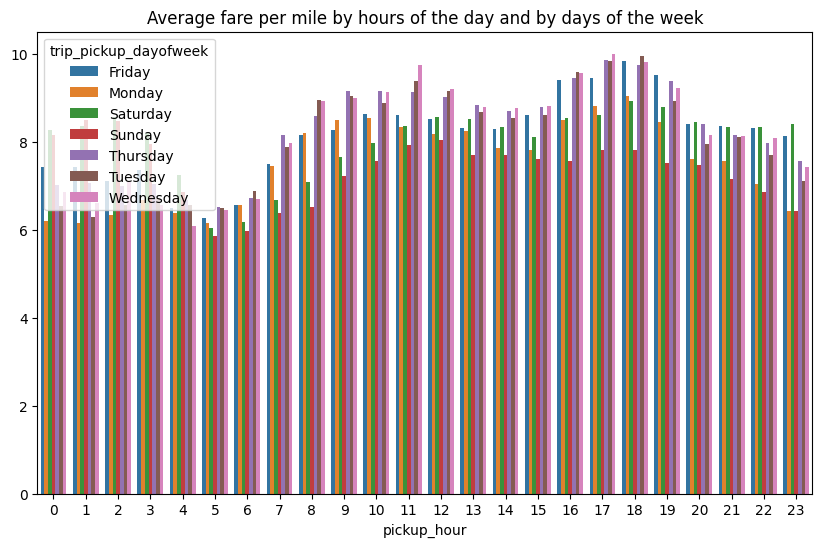

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
df_avg_fare_per_mile = df_merged.groupby(['pickup_hour', 'trip_pickup_dayofweek'])['total_amount'].sum() / df_merged.groupby(['pickup_hour', 'trip_pickup_dayofweek'])['trip_distance'].sum()
df_avg_fare_per_mile.head()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_avg_fare_per_mile.index.get_level_values(0), y=df_avg_fare_per_mile.values, hue=df_avg_fare_per_mile.index.get_level_values(1))
# ax.bar_label(ax.containers[0])
plt.title('Average fare per mile by hours of the day and by days of the week')
plt.show()


**Explanation**

The above chart shows fare per mile by hour and days of week.

* The chart relates to the other chart we saw for day of week with respect to taxi count. The week day Wednesdays, Thursdays, Tuesdays and Fridays have highest fare / mile data and that is highest around 1600hrs (4PM) to 1800hr (6PM) in the evenings with highest values hitting around $9/mile around 1700hrs (5PM).
* Similar higher fare/mile data is seen in morning hours of weekdays around 0900hrs(9AM) to 1200hr (12PM) during weekdays.
* For weekends, that is, Saturdays and Sundays, we see higher fare / mile data from 2100hr to early morning 3:00AM.

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

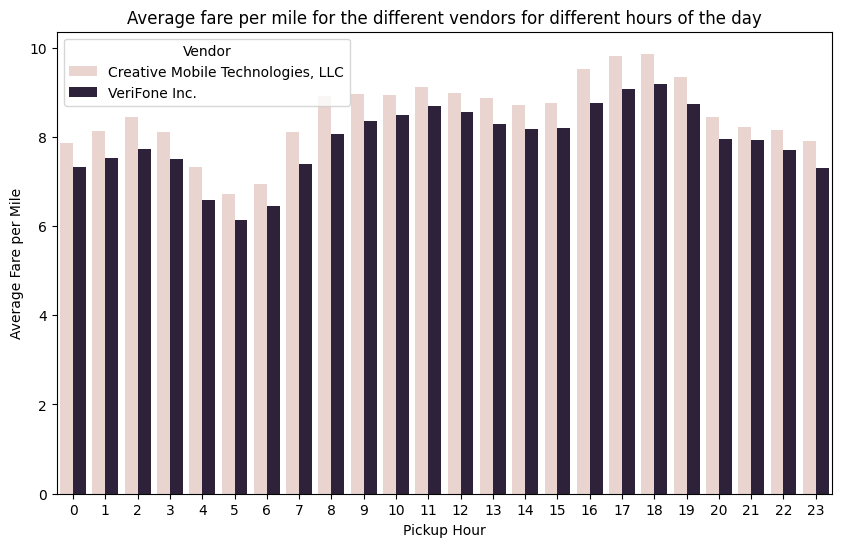

<Figure size 640x480 with 0 Axes>

In [ ]:
# Compare fare per mile for different vendors
df_avg_fare_per_mile_vendor = df_merged.groupby(['pickup_hour', 'VendorID'])['total_amount'].sum() / df_merged.groupby(['pickup_hour', 'VendorID'])['trip_distance'].sum()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_avg_fare_per_mile_vendor.index.get_level_values(0), y=df_avg_fare_per_mile_vendor.values, hue=df_avg_fare_per_mile_vendor.index.get_level_values(1))
plt.xlabel('Pickup Hour')
plt.ylabel('Average Fare per Mile')
plt.title('Average fare per mile for the different vendors for different hours of the day')

# Create custom legend labels
vendor_labels = {1: 'Creative Mobile Technologies, LLC', 2: 'VeriFone Inc.'}
handles, labels = ax.get_legend_handles_labels()
new_labels = [vendor_labels[int(label)] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Vendor')

plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/average_fare_per_mile_vendor_hourly_barplot.png')

**Explanation**

Above plots show average fare per mile for different vendors (Hourly)

This bar plot compares the average fare per mile charged by two vendors, 'Creative Mobile Technologies, LLC' (Vendor 1) and 'VeriFone Inc.' (Vendor 2), for each hour of the day.

**Key Observations:**

* Vendor 1 (Creative Mobile Technologies, LLC): Generally appears to have a slightly higher average fare per mile across most hours compared to Vendor 2. Their peak average fare per mile often reaches above $9.0/mile, particularly in the mid-morning and late afternoon/early evening.
* Vendor 2 (VeriFone Inc.): Consistently shows a slightly lower average fare per mile than Vendor 1. Their fares also follow a similar diurnal pattern but at a slightly reduced rate.
* Hourly Trends: Both vendors exhibit similar trends throughout the day:
Early Morning (0-5 AM): The average fare per mile is relatively moderate, but can fluctuate. There are times when it drops slightly before picking up.
* Morning Rush (6-10 AM): Fares generally increase, likely due to higher demand during commuting hours.
Midday/Afternoon (11 AM - 4 PM): Fares remain high, with some fluctuations.
* Evening Peak (5 PM - 8 PM): Both vendors often show their highest average fares per mile during these hours, correlating with evening rush hour and social activities.
* Late Night (9 PM - 11 PM): Fares tend to gradually decrease.
Consistency: Despite the absolute difference in average fare per mile, the pattern of fare changes across the hours is quite consistent between the two vendors. This suggests that both vendors are reacting to similar demand and supply dynamics throughout the day, but with different base pricing strategies or operational costs reflected in their per-mile rates.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers
distance_tiers = [0, 2, 5, float('inf')]
distance_labels = ['0-2 miles', '2-5 miles', '5+ miles']
df_merged_copy = df_merged.copy()
df_merged_copy['distance_tier'] = pd.cut(df_merged['trip_distance'], bins=distance_tiers, labels=distance_labels, right=False)
df_avg_fare_per_mile_vendor = df_merged_copy.groupby(['distance_tier', 'VendorID'])['total_amount'].sum() / df_merged_copy.groupby(['distance_tier', 'VendorID'])['trip_distance'].sum()
display(df_avg_fare_per_mile_vendor)

distance_tier  VendorID
0-2 miles      1           15.258215
               2           15.504184
2-5 miles      1            9.113464
               2            9.187658
5+ miles       1            5.813743
               2            5.804783
dtype: float64

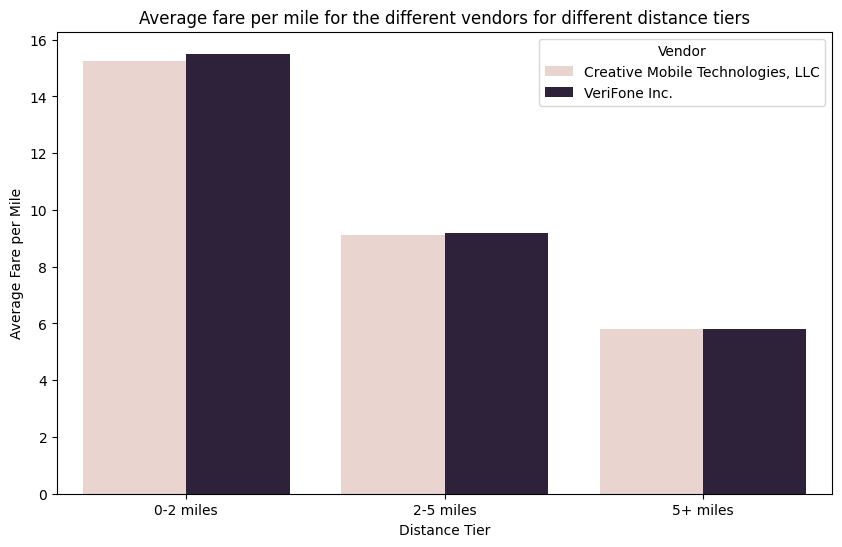

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_avg_fare_per_mile_vendor.index.get_level_values(0), y=df_avg_fare_per_mile_vendor.values, hue=df_avg_fare_per_mile_vendor.index.get_level_values(1))
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.title('Average fare per mile for the different vendors for different distance tiers')

# Create custom legend labels
vendor_labels = {1: 'Creative Mobile Technologies, LLC', 2: 'VeriFone Inc.'}
handles, labels = ax.get_legend_handles_labels()
new_labels = [vendor_labels[int(label)] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Vendor')
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/average_fare_per_mile_vendor_distance_tier_barplot.png')


**Explanation**

The above chart shows average fare per mile for both the vendors for three different miles tiers of 0-2 miles, 2-5miles, and 5+ miles.

**Key observations**

* For 0-2 miles tier, the fare / mile is highests across vendors where both of them has around $15 / mile with Creative Mobile Technologies has slight higher value than Verifone.

** For 2-5 miles tier, the fare / mile data is almost same value of $9/mile for both the vendors.

** For 5+ miles tier, the fare / mile is lowest almost hitting around $6/mile.

This shows that 0-2 mile tier is much more profitable than other two tiers of 2-5miles and 5+miles. So both vendors should have taxis available for locations which has higher trips in the 0-2 miles travel.

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_tip_percentage_distance = (df_merged.groupby('trip_distance')['tip_amount'].sum() / df_merged.groupby('trip_distance')['total_amount'].sum()).reset_index(name='tip_percentage')
display(df_tip_percentage_distance.head())

df_tip_percentage_passenger_count = (df_merged_non_zero_psgr.groupby('passenger_count')['tip_amount'].sum() / df_merged_non_zero_psgr.groupby('passenger_count')['total_amount'].sum()).reset_index(name='tip_percentage')
display(df_tip_percentage_passenger_count.head())

df_tip_percentage_pickup_time = (df_merged.groupby('pickup_hour')['tip_amount'].sum() / df_merged.groupby('pickup_hour')['total_amount'].sum()).reset_index(name='tip_percentage')
display(df_tip_percentage_pickup_time.head())


trip_distance  tip_percentage
0           0.00        0.093408
1           0.01        0.079966
2           0.02        0.062903
3           0.03        0.076932
4           0.04        0.095143

passenger_count  tip_percentage
0              1.0        0.126392
1              2.0        0.121240
2              3.0        0.116580
3              4.0        0.106840
4              5.0        0.125219

pickup_hour  tip_percentage
0            0        0.121286
1            1        0.121648
2            2        0.119828
3            3        0.112946
4            4        0.113615

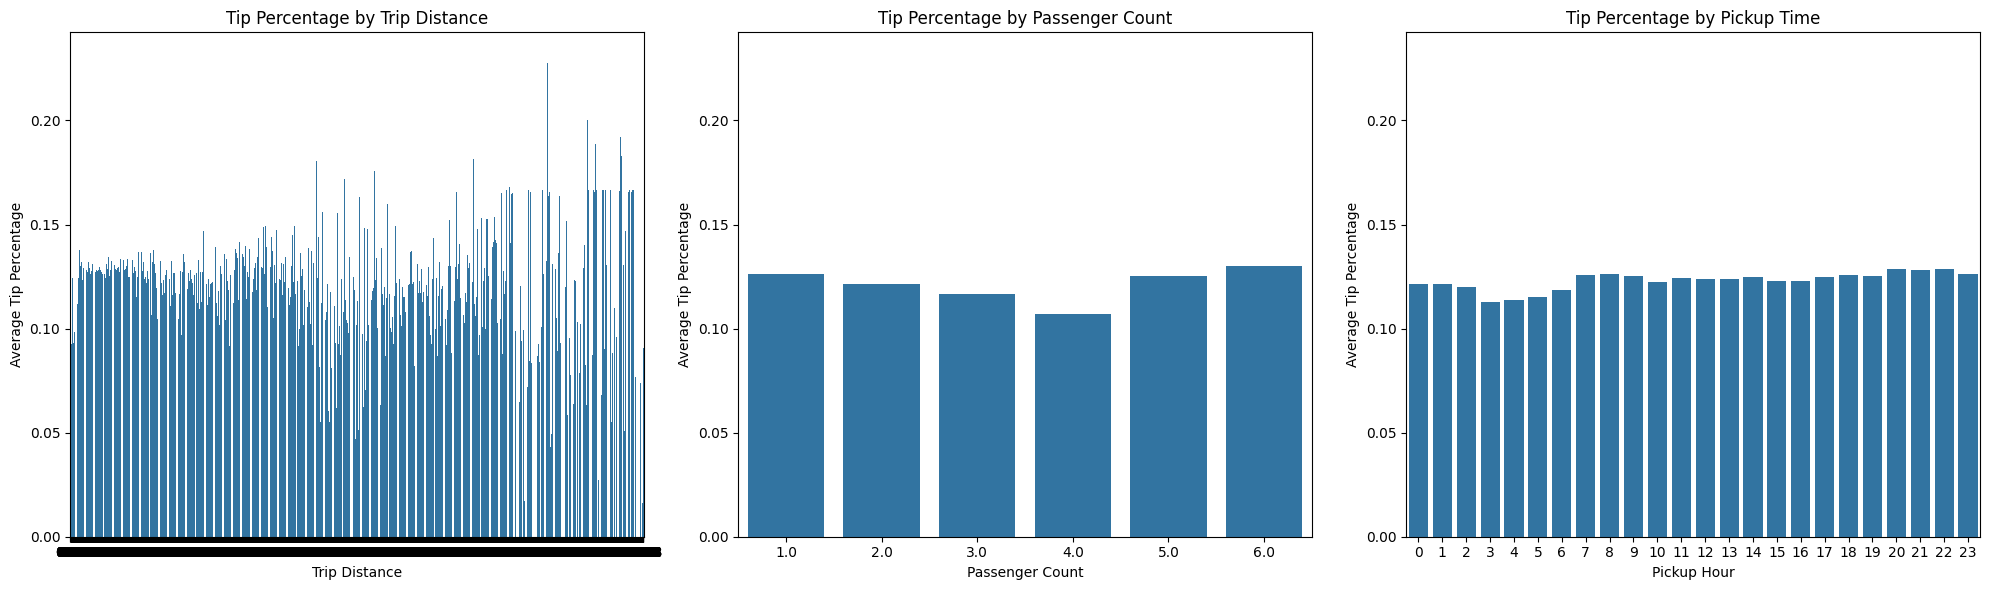

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 6))

# Subplot for Tip Percentage by Trip Distance
ax1 = plt.subplot(1, 3, 1)
sns.barplot(x=df_tip_percentage_distance.trip_distance, y=df_tip_percentage_distance.tip_percentage)
ax1.set_title('Tip Percentage by Trip Distance')
ax1.set_xlabel('Trip Distance')
ax1.set_ylabel('Average Tip Percentage')


# Subplot for Tip Percentage by Passenger Count
ax2 = plt.subplot(1, 3, 2, sharey=ax1)
sns.barplot(x=df_tip_percentage_passenger_count.passenger_count, y=df_tip_percentage_passenger_count.tip_percentage)
ax2.set_title('Tip Percentage by Passenger Count')
ax2.set_xlabel('Passenger Count')
ax2.set_ylabel('Average Tip Percentage')

# Subplot for Tip Percentage by Pickup Time
ax3 = plt.subplot(1, 3, 3, sharey=ax1)
sns.barplot(x=df_tip_percentage_pickup_time.pickup_hour, y=df_tip_percentage_pickup_time.tip_percentage)
ax3.set_title('Tip Percentage by Pickup Time')
ax3.set_xlabel('Pickup Hour')
ax3.set_ylabel('Average Tip Percentage')

plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/tip_percentage_analysis_subplots.png')

**Explanation**

Above charts are a subplot display of tip percentage for trip_distance, passenger_count and pickup_hours.

**Key Observations**

* Tip percentage is clearly showing higher values in the higher trip distance category in comparsion with lower trip distance. There are few higher trip distance in moderate distance categary as well. We should identify those patterns for moderate distance.

* For passenger count of 1 or higher passenger count of 5 or 6, the tip percentage is higher.

* For pickup hour from 7am to 9am shows highest tip percentage, including early morning trips from 1200am to 2am.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

<Figure size 1000x500 with 0 Axes>

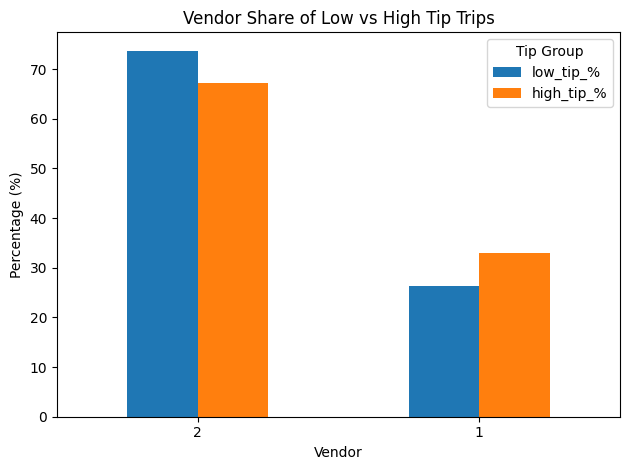

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Use the three different trip precentage calculated earlier for distance, passenger_count and pickup hours
low_tip_mask = (df_merged['tip_amount'] / df_merged['total_amount']) < 0.1
high_tip_mask = (df_merged['tip_amount'] / df_merged['total_amount']) > 0.25

# Filter the data
df_low_tip = df_merged[low_tip_mask]
df_high_tip = df_merged[high_tip_mask]

vendor_comparison_pct = pd.DataFrame({
    "low_tip_%": df_low_tip["VendorID"].value_counts(normalize=True) * 100,
    "high_tip_%": df_high_tip["VendorID"].value_counts(normalize=True) * 100
}).round(2)

vendor_comparison_pct

plt.figure(figsize=(10, 5))
vendor_comparison_pct.plot(kind="bar")
plt.title("Vendor Share of Low vs High Tip Trips")
plt.ylabel("Percentage (%)")
plt.xlabel("Vendor")
plt.xticks(rotation=0)
plt.legend(title="Tip Group")
plt.tight_layout()
plt.show()


**Explanation**

Vendor 2 has higher tip percentage in comparison to vendor 1 in both the categories. So clearly, vendor 2 is taking some good measures for customer satisfactions which can be taken up by Vendor 1 to improve driver earning in terms of tip amount.

For vendor 2, tip percentage of 10% is slightly higher than 70% in comparison to the 25% tip amount which is falling aroung 65%.

For Vendor 1, the 25% tipping amount is higher than 10% tipping percentage

low_tip_%  high_tip_%
DOLocationID                       
161                3.93        3.42
237                3.91        3.62
236                3.76        4.58
230                3.44        3.08
170                2.89        3.21
162                2.72        3.14
48                 2.68        3.62
142                2.54        2.19
141                2.47        2.12
163                2.45        2.46

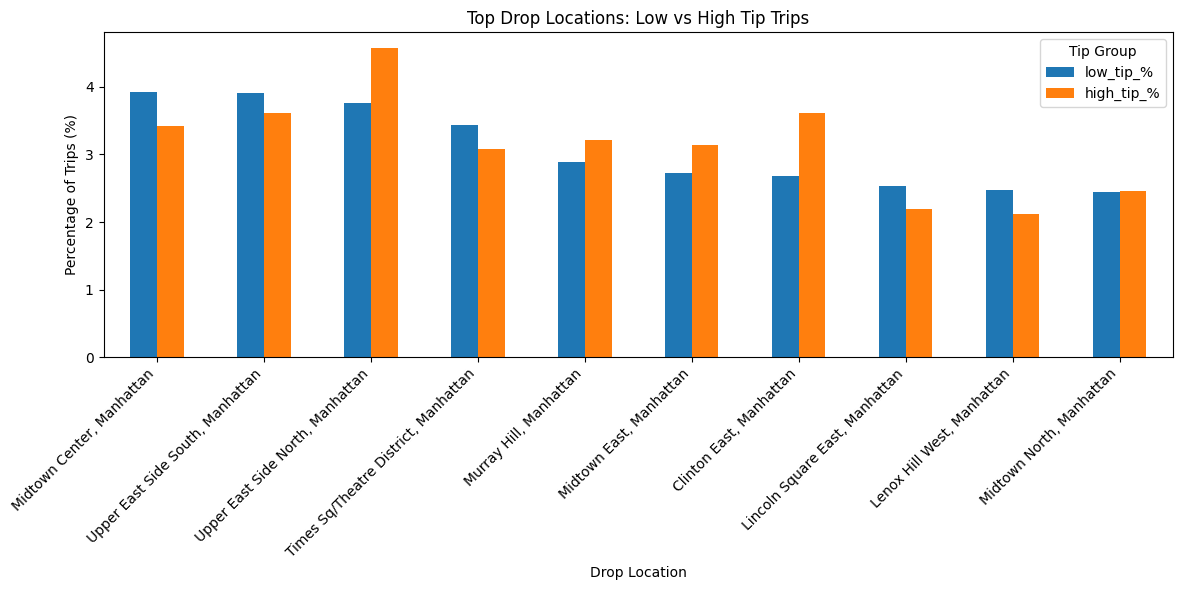

In [ ]:
top_n = 10

low_drop = df_low_tip["DOLocationID"].value_counts()
high_drop = df_high_tip["DOLocationID"].value_counts()

top_locations = (low_drop + high_drop).sort_values(ascending=False).head(top_n).index

drop_comparison = pd.DataFrame({
    "low_tip_%": low_drop.loc[top_locations] / low_drop.sum() * 100,
    "high_tip_%": high_drop.loc[top_locations] / high_drop.sum() * 100
}).fillna(0).round(2)

display(drop_comparison)
# Ensure combined_location_names are in the same order as drop_comparison.index
combined_location_names = []
for loc_id in drop_comparison.index:
    zone_info = zones[zones['LocationID'] == loc_id].iloc[0]
    combined_location_names.append(f"{zone_info['zone']}, {zone_info['borough']}")

# print(combined_location_names)

plt.figure(figsize=(12, 6))
ax = drop_comparison.plot(kind="bar", ax=plt.gca())
plt.title("Top Drop Locations: Low vs High Tip Trips")
plt.ylabel("Percentage of Trips (%)")
plt.xlabel("Drop Location")

# Set x-ticks and labels directly on the axes object
ax.set_xticks(range(len(drop_comparison.index)))
ax.set_xticklabels(combined_location_names, rotation=45, ha='right')

plt.tight_layout()
plt.legend(title="Tip Group")
plt.show()

**Explanation**

Above chart shows the tipping percentage variations for top 10 drop locations.

* Upper East Side North, Manhattan - shows higher percentage tipping behavior

* Midtown Center, Manhattan', 'Upper East Side South, Manhattan' and Upper East Side North, Manhattan location has hight value of lower tipping percentage (10%)

* 'Lincoln Square East, Manhattan', 'Lenox Hill West, Manhattan' shows lower tipping behavior in both higher and lower tipping percentage category.



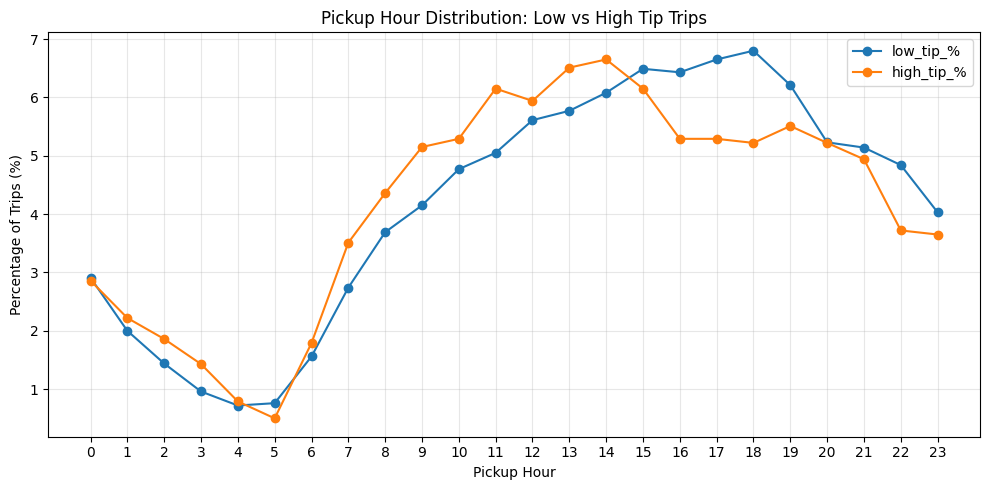

In [ ]:
pickup_hour_comparison = pd.DataFrame({
    "low_tip_%": df_low_tip["pickup_hour"].value_counts(normalize=True) * 100,
    "high_tip_%": df_high_tip["pickup_hour"].value_counts(normalize=True) * 100
}).sort_index().round(2)
pickup_hour_comparison

plt.figure(figsize=(10, 5))
pickup_hour_comparison.plot(kind="bar")
plt.title("Pickup Hour Distribution: Low vs High Tip Trips")
plt.xlabel("Pickup Hour")
plt.ylabel("Percentage of Trips (%)")
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Explanation**

The above chart provides comparison of lower (10%) and higher(25%) tipping percentage in terms of pickup hours.

**Key observations**

Chart shows slight higher tipping behavior for early morning trips from 1am to 4am, dipping sharply for 5am trips. There's a sligh overlapping between the two tipping percentages for trip between 5am to 6am, but then again from 6am till 2pm shows higher tipping percentage of 25% behavior shown than lower tipping percentage.

For later part of day, from 3pm onwards, the tipping behavior shows lower tipping percentage more prevalent till late night of 2300hrs.

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

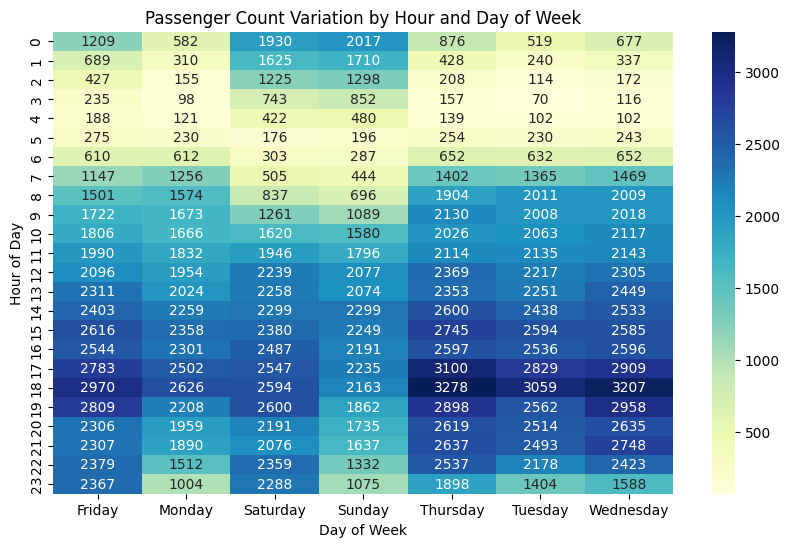

In [ ]:
# See how passenger count varies across hours and days
df_group_by_psg_count_hour_dow = df_merged.groupby(['pickup_hour', 'trip_pickup_dayofweek'])['passenger_count'].count()
df_group_by_psg_count_hour_dow.head()

df_group_by_psg_count_hour_dow.unstack(fill_value=0)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_group_by_psg_count_hour_dow.unstack(fill_value=0), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Passenger Count Variation by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()


**Explanation**

Above chart is a heatmap depicting passenger count for weekdays on hourly basis.

Dark blue color shows higher passenger count mentioning count of passenger overall and ligher color similarly shows lesser count of passernger during that time of day on that day of week.

**Key observation**

* This chart clearly shows highest passenger count 3278 on thursdays at 1800hrs, which corresponds to the pervious analysis as well. This follows by slightly lower number of passenger on Wednesdays and then tuesdays. Next in line in terms of passenger count is seen on Fridays as well.

* Thursdays have generally higher passenge count beginning from 7am going till late night. Similar slightly lower numbers seen on Wednesdays and Tuesdays  well.

* Weekends, that is Sat and Sunday shows higher early morning traffic 00hr (12AM) to 0200hr (2AM).



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
# Get average passenge count
df_group_by_psg_count_zone = df_merged.loc[df_merged['passenger_count'] > 0].groupby(['PULocationID'])['passenger_count'].mean().reset_index(name='avg_psngr_count')
df_group_by_psg_count_zone.head()



PULocationID  avg_psngr_count
0             1         1.500000
1             3         2.000000
2             4         1.360656
3             6         1.600000
4             7         1.239726

In [ ]:
# Calculate average passenger count per PULocationID
avg_passenger_counts_per_zone = df_merged.groupby('PULocationID')['passenger_count'].mean().rename('avg_passenger_count')

# Merge these average passenger counts back to the zones GeoDataFrame
zones_with_avg_passengers = zones.merge(avg_passenger_counts_per_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Fill any NaN values in 'avg_passenger_count' with 0 for zones with no recorded trips
zones_with_avg_passengers['avg_passenger_count'] = zones_with_avg_passengers['avg_passenger_count'].fillna(0)

# Display the head of the updated GeoDataFrame
display(zones_with_avg_passengers.sort_values(by='avg_passenger_count', ascending=False).head())

OBJECTID  Shape_Leng  Shape_Area                zone  LocationID  \
130       131    0.116547    0.000424     Jamaica Estates         131   
148       149    0.083681    0.000271             Madison         149   
33         34    0.065706    0.000174  Brooklyn Navy Yard          34   
56         57    0.019271    0.000018              Corona          56   
55         56    0.056848    0.000181              Corona          56   

      borough                                           geometry  trip_count  \
130    Queens  POLYGON ((1045972.529 202542.128, 1045985.752 ...           2   
148  Brooklyn  POLYGON ((999782.783 162246.843, 999853.961 16...           3   
33   Brooklyn  MULTIPOLYGON (((991923.998 197615.718, 992381....           7   
56     Queens  POLYGON ((1025447.751 212499.788, 1024585.351 ...          14   
55     Queens  POLYGON ((1024813.399 211643.796, 1024910.997 ...          14   

     avg_passenger_count  
130             3.500000  
148             2.666667  
33              2.571429  
56              2.571429  
55              2.571429

Now, let's plot the average passenger count per zone on the map.

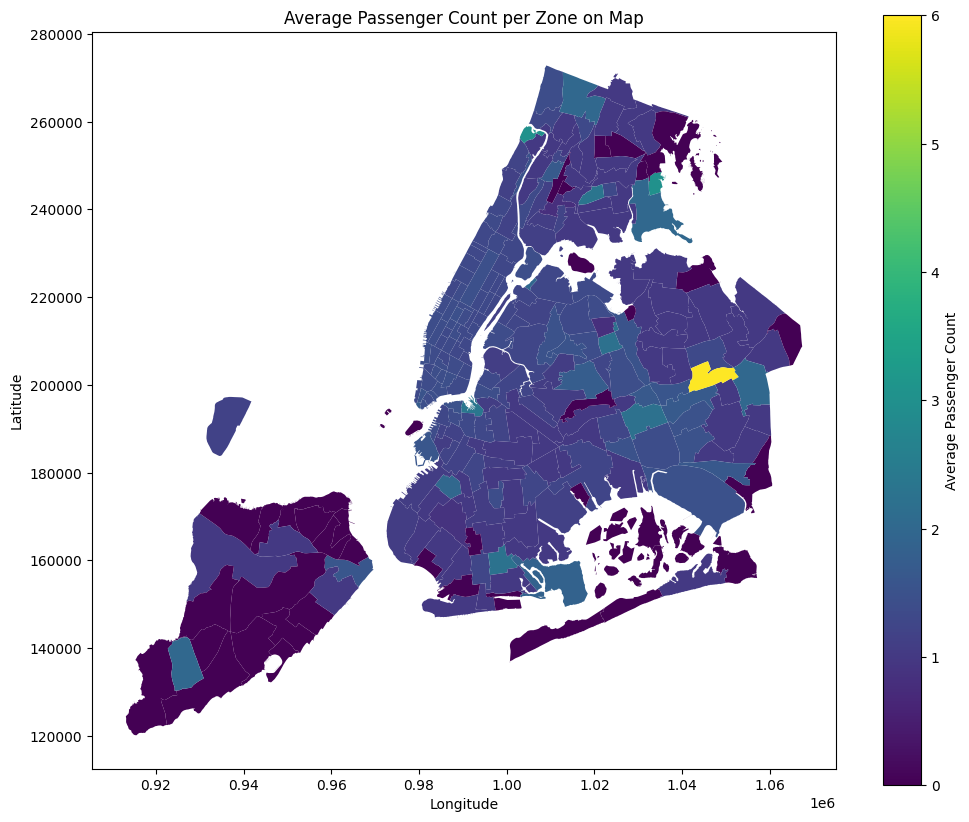

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones_with_avg_passengers.plot(
    column='avg_passenger_count',
    ax=ax,
    legend=True,
    cmap='viridis',
    legend_kwds={'label': "Average Passenger Count", 'orientation': "vertical"}
)
plt.title('Average Passenger Count per Zone on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.savefig('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/newcharts/average_passenger_count_map.png')

**Explanation**

**Key Observations:**

* **Color Scale**: The map uses a 'viridis' colormap, where darker shades (purple/blue) indicate lower average passenger counts, and lighter shades (green/yellow) indicate higher average passenger counts.
* **High Average Passenger Counts**: Some areas in Queens (visible as brighter green/yellow zones) appear to have relatively higher average passenger counts (approaching 3.0-3.5 passengers per trip). This could include areas around airports or major transportation hubs where groups might travel together.
* **Moderate Average Passenger Counts**: Many zones, particularly across Manhattan, show moderate average passenger counts (around 1.5 to 2.5 passengers per trip), represented by shades of blue and green. This is consistent with a mix of single travelers and small groups.
* **Low Average Passenger Counts**: Several zones, especially in Staten Island and some peripheral areas of other boroughs, display very low average passenger counts (below 1.0 or close to 0), indicated by the darker purple shades. These might be less populated areas or zones with fewer taxi pickups overall.
* **Overall Distribution**: While single-passenger trips are the most common overall, this map highlights the geographical variations where larger groups are more frequently picked up. These areas with higher average passenger counts might indicate locations like tourist attractions, event venues, or specific residential areas where group travel is more common.

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Surcharge Type     Sum  Proportion
0                  extra  170364   60.965782
1                mta_tax  276924   99.098919
2  improvement_surcharge  279431   99.996064
3   congestion_surcharge  260355   93.169602
4            airport_fee   24048    8.605721

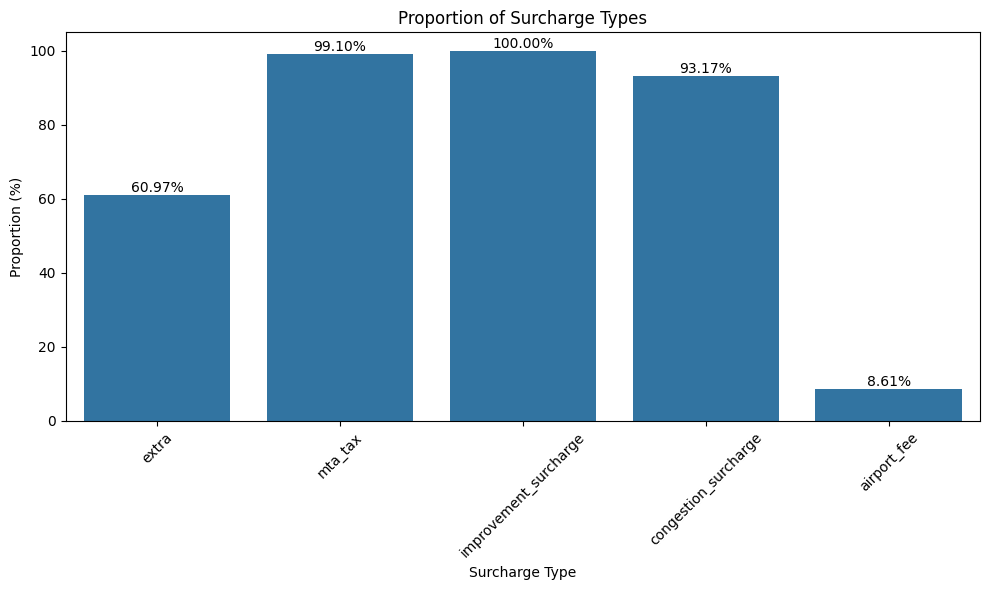

In [ ]:
# Define the list of surcharge columns
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

# Create a list to store the data for the new DataFrame
data_for_df = []

# Iterate through each surcharge column to calculate sum and mean
for col in surcharge_columns:
    col_sum = (df_merged[col]>0).sum()
    col_prop = (df_merged[col] > 0).mean() * 100
    data_for_df.append({
        'Surcharge Type': col,
        'Sum': col_sum,
        'Proportion': col_prop
    })

# Create the new DataFrame
df_surcharges_summary = pd.DataFrame(data_for_df)

# Display the new DataFrame
display(df_surcharges_summary)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Surcharge Type', y='Proportion', data=df_surcharges_summary)
ax.bar_label(ax.containers[0], fmt='%.2f%%')
plt.title('Proportion of Surcharge Types')
plt.xlabel('Surcharge Type')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Observations and Explanations:**

* **Improvement Surcharge (99.996%):** This surcharge was applied to 99.996% of all trips. The fact that it's applied to all trips indicates it's a universal, mandatory fee for every ride.

* **MTA Tax (99.10%):** The MTA tax was applied to 99.10% of trips. Its near-universal application suggests it's a standard tax for almost all taxi rides, with a very small fraction of trips perhaps being exempt due to specific conditions or data anomalies.

* **Congestion Surcharge (93.17%):** This surcharge was applied in 93.17% of trips. The high proportion indicates that a vast majority of taxi trips in NYC occur within, or pass through, the designated congestion pricing zone, making this a very common additional cost for passengers.

* **Extra (60.97%):** The 'extra' charge was applied in 60.97% of trips. This category includes "Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges." The fact that it's applied to over 60% of trips suggests that rush hour and/or overnight travel are very common, significantly impacting the total fare for a large portion of passengers.

* **Airport Fee (8.61%):** The airport fee was applied in 8.61% of trips. The relatively lower percentage is expected, as not all taxi trips involve pickups from these specific airports.

## **4** Conclusion
<font color = red>[15 marks]</font> <br>


Based on the comprehensive exploratory data analysis of the 2023 New York City Yellow Taxi data, several key patterns and trends emerged, offering valuable insights for optimizing taxi operations.

**Key Insights:**

*   **Temporal Demand Patterns:**
    *   **Hourly:** The busiest hours for taxi pickups are consistently between **4 PM and 7 PM (16:00-19:00)** on weekdays, with the absolute peak at **6 PM (18:00)**. Early morning hours (3 AM - 5 AM) are the quietest.
    *   **Daily:** **Weekdays (especially Thursday and Wednesday)** exhibit higher demand compared to weekends. Monday typically has the lowest demand.
    *   **Monthly/Quarterly:** **October, May, and March** are the months with the highest pickup counts and corresponding highest revenues. Q2 (April-June) and Q4 (October-December) are the most lucrative quarters, with slight dips in summer months (July-August) and February.
    *   **Night vs. Day Revenue:** While daytime peaks are prominent, nighttime hours (especially 11 PM - 1 AM) also generate significant revenue, likely due to airport runs and late-night activities.
*   **Geographical Demand Patterns (Busiest Zones):**
    *   **JFK Airport (LocationID 132)** stands out as the zone with the highest number of trips, indicating its critical role as a major hub.
    *   **Midtown Center (161), Upper East Side South (237), Upper East Side North (236), and Midtown East (162)** are consistently high-activity zones, particularly in Manhattan.
    *   **Pickup/Dropoff Ratios:** Zones like East Elmhurst (70) and airports (JFK 132, LaGuardia 138) show high pickup-to-dropoff ratios, indicating they are primary origin points where taxis are picked up and then leave the area.
*   **Financial Trends:**
    *   **Fare & Distance/Duration:** `fare_amount` is highly correlated with `trip_distance` (0.94) and moderately correlated with `trip_duration_mins` (0.53), as expected.
    *   **Fare & Passenger Count:** `fare_amount` shows very little correlation with `passenger_count` (0.04).
    *   **Payment Types:** Credit cards are the predominant payment method, generating the most revenue, followed by cash. "Dispute" and "Unknown" payment types also account for a notable share.
    *   **Average Fare per Mile:** The average fare per mile is highest for short trips (0-2 miles) and decreases for longer distances, suggesting a base fare component that makes short trips disproportionately expensive per mile.
    *   **Vendor Comparison:** Vendor 1 (Creative Mobile Technologies) generally charges a slightly higher average fare per mile than Vendor 2 (VeriFone Inc.) across most hours and distance tiers, yet both follow similar hourly demand and pricing patterns.
    *   **Tipping Behavior:** Tip percentages are relatively consistent across passenger counts but tend to be higher for longer distances and during late-night/early morning or evening peak hours. Vendor 1 appears to have a higher percentage of high-tip trips.
*   **Operational Inefficiencies:**
    *   **Slow Routes:** Analyzing `speed_in_per_mins` per hour between zones can highlight specific routes and times experiencing significant congestion.
    *   **Outliers:** The data contained outliers such as trips with zero distance but high fare, and long durations for short distances, which were addressed during cleaning.

**Concluding Story for Strategy Optimization:**

To meet customer demand and optimize supply, a taxi operation in NYC should implement a dynamic strategy informed by these insights.

During **weekday evenings (4 PM - 7 PM), especially Thursday and Wednesday**, and during **late weekend nights (11 PM - 1 AM)**, the company should significantly **increase taxi supply** in high-demand Manhattan zones like **Midtown Center, Upper East Side, and Midtown East**, as well as at **JFK and LaGuardia Airports**. These are the periods and locations where demand and revenue potential are highest.

Conversely, during **early weekday mornings (3 AM - 5 AM)**, when demand is lowest across all zones, the company could strategically **reduce fleet size** or direct taxis to areas where early morning airport pickups might still occur.

For **origin zones with high pickup-to-dropoff ratios (e.g., East Elmhurst, JFK Airport)**, taxis should be proactively repositioned to ensure constant availability, as these areas primarily serve as starting points for journeys.

From a **pricing perspective**, dynamic pricing should be implemented to **increase fares during peak demand hours and in high-traffic zones**. The observation that short trips (0-2 miles) have the highest average fare per mile indicates that initial fare structures are already optimized for profitability on short distances. However, this should be balanced against competitiveness, especially when compared to Vendor 2, which generally offers slightly lower per-mile rates. Monitoring competitor pricing and customer feedback will be crucial. Incentives could be explored for drivers operating in lower-demand areas or during off-peak hours to maintain service coverage.

Regarding **customer experience**, analyzing tipping behavior suggests that focusing on service quality during lower-tipping times (late morning/afternoon) or in low-tipping zones could potentially boost driver income and customer satisfaction. The difference in high-tip percentages between vendors also suggests opportunities for learning best practices from Vendor 1.

By leveraging these insights on **location (Manhattan commercial/residential hubs, Airports), time of day (evening peaks, late nights), and day of week (weekdays > weekends)**, a taxi operation can develop a robust strategy for optimal routing, dispatching, and pricing, leading to improved service efficiency, maximum revenue, and enhanced passenger experience.

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies


1.  **Dynamic Fleet Positioning for Peak Demand:**
    *   **Weekdays (4 PM - 7 PM):** Deploy a higher concentration of taxis to Manhattan's Midtown, Upper East Side, and Financial District areas. These hours and locations consistently show the highest pickup volumes.
    *   **Weekends (Late Night/Early Morning, 11 PM - 2 AM):** Shift resources to entertainment districts and airport zones, where demand remains high even after traditional weekday peak hours.
    *   **Airports (JFK, LaGuardia):** Maintain a steady and significant supply of taxis, especially during morning and evening rush hours, and throughout the night, given their consistently high pickup numbers and high pickup-to-dropoff ratios. Consider a dedicated airport fleet or incentivized airport runs.
2.  **Bottleneck Identification and Alternative Route Guidance:**
    *   Utilize the "speed per minute" analysis for specific `PULocationID` to `DOLocationID` routes across different hours. Identify routes that are consistently slow during peak times.
    *   Integrate this data into real-time dispatching systems to suggest alternative, faster routes to drivers, especially for trips originating or ending in congested areas. This improves efficiency and passenger satisfaction.
3.  **Optimize Off-Peak Operations:**
    *   **Early Mornings (3 AM - 5 AM):** During these quietest hours, consider reduced operational staff, schedule vehicle maintenance, or incentivize drivers to be available in zones with slightly higher, albeit still low, demand (e.g., airports or 24/7 commercial areas).
    *   **Load Balancing:** Implement dispatch algorithms that not only prioritize demand but also minimize deadheading (empty travel) by guiding drivers towards upcoming high-demand zones after dropping off passengers.
4.  **Day-of-Week Specific Strategies:**
    *   **Thursday & Wednesday:** Recognize these as the busiest weekdays and ensure maximum driver availability.
    *   **Monday:** Implement targeted promotions or incentives to encourage more rides or driver presence, as it's the quietest weekday.
    *   **Weekend Shift:** Adapt staffing and positioning strategies to cater to leisure-focused travel patterns, which might include later peak hours and different popular zones compared to weekdays.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1.  **Hotspot Mapping & Predictive Positioning:**
    *   Develop a real-time "heat map" of demand based on historical pickup data, updated hourly and daily. This map should highlight zones like JFK Airport (132), Midtown Center (161), Upper East Side South (237), Upper East Side North (236), and Midtown East (162).
    *   Use predictive analytics to forecast demand surges in specific zones for the upcoming hour or several hours, especially factoring in month-specific trends (e.g., higher demand in October for certain areas).
    *   Strategically position available taxis close to these predicted hotspots, even before a booking request comes in, to reduce pickup times and increase efficiency.
2.  **Addressing Pickup/Dropoff Imbalances:**
    *   For zones with very high pickup-to-dropoff ratios (e.g., East Elmhurst, JFK, LaGuardia Airports), ensure a continuous flow of taxis into these zones. After dropping passengers off in a high pickup-ratio zone, drivers should be immediately prompted to seek new passengers within that same zone or nearby high-demand zones.
    *   For zones with low pickup-to-dropoff ratios (more dropoffs than pickups), incentivize drivers to quickly move out of these areas to more promising pickup locations to minimize idle time.
3.  **Tiered Zone Prioritization:**
    *   Categorize zones by their average revenue potential, demand consistency, and congestion levels.
    *   Prioritize dispatching to high-value zones first, especially during peak hours.
    *   Implement smart dispatching that considers the efficiency of the overall network rather than just individual trip profitability, optimizing for maximum total trips and revenue.
4.  **Special Event and Seasonal Adjustments:**
    *   Integrate data on major events (concerts, sports, festivals) and seasonal tourist flows (e.g., more tourist traffic in spring/fall months like May and October) to anticipate localized demand spikes.
    *   Pre-position additional vehicles and drivers near event venues or tourist attractions accordingly.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.


1.  **Dynamic Pricing based on Demand, Time, and Location:**
    *   **Peak Hour Surcharges:** Automatically apply higher fare multipliers during peak hours (weekday 4 PM - 7 PM, weekend late nights) and in high-demand zones (Midtown, Upper East Side, Airports). This maximizes revenue when demand is inelastic.
    *   **Off-Peak Incentives:** Experiment with minor discounts or promotions during off-peak hours (e.g., early mornings, Monday afternoons) to stimulate demand and utilize idle capacity, ensuring these don't cannibalize peak revenue.
    *   **Congestion-Based Pricing:** Leverage insights from slow routes to apply targeted congestion surcharges for trips through known bottleneck areas during peak congestion times, reflecting the increased operational cost and time.
2.  **Tiered Distance Pricing Refinement:**
    *   The current structure already shows higher per-mile fares for shorter trips (0-2 miles). Maintain this strategy, as it captures value from quick, high-turnover rides.
    *   Review the transition points for distance tiers (e.g., 2-5 miles vs. 5+ miles). Ensure the fare drop-off for longer distances is competitive and reflects operational costs.
    *   Consider implementing a progressive fare per mile, where the rate slightly decreases beyond a certain distance to remain attractive for longer journeys.
3.  **Competitive Vendor Analysis & Differentiation:**
    *   **Monitor Competitors:** Continuously track Vendor 1 (Creative Mobile) and Vendor 2 (VeriFone) pricing, especially their average fare per mile. If Vendor 1 can charge slightly more and attract high-tip customers, it suggests opportunities for premium service offerings.
    *   **Value Proposition:** If the company aims for market share, position itself with slightly lower, more competitive base rates (like Vendor 2). If targeting higher-value segments, focus on service quality (cleaner cars, better drivers) to justify a premium similar to Vendor 1.
    *   **Transparent Surcharges:** While congestion and improvement surcharges are common, ensure transparency in their application to maintain customer trust.
4.  **Tipping Optimization Strategies:**
    *   **In-App Tipping Prompts:** Implement smart in-app tipping suggestions based on trip distance, time, and service quality ratings to encourage higher tips, particularly during identified low-tipping periods (late morning/afternoon).
    *   **Driver Incentives:** Offer bonus structures for drivers who maintain high customer satisfaction ratings, potentially leading to higher tips.
    *   **Targeted Service Improvements:** Invest in driver training or vehicle upgrades for operations in zones or at times identified with lower tip percentages to improve the perceived value of the service.
5.  **Passenger Count & Fare Structure:**
    *   Given the low correlation between `fare_amount` and `passenger_count`, consider flat-rate charges for additional passengers beyond a certain number, or explore shared-ride options with dynamic pricing based on passenger count for efficiency.
    *   The higher per-mile per-passenger fare for single passengers and groups of 5 suggests there's already some implicit optimization, but direct strategies could be more overt.